In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=2)
%matplotlib inline
!pwd

/home/ikea/GraphLearn/example


In [3]:
'''
somehow we need to get RNA data...
'''

from eden.converter.fasta import fasta_to_sequence
from eden.converter.rna.rnafold import rnafold_to_eden
import graphlearn.abstract_graphs.rnasampler as rspl
import graphlearn.abstract_graphs.directedgraphtools as dgtools

from eden.graph import Vectorizer
def rfam_uri(family_id):
    return 'http://rfam.xfam.org/family/%s/alignment?acc=%s&format=fastau&download=0'%(family_id,family_id)

def rfam_uri(family_id):
    return '%s.fa'%(family_id)


def get_graphs(rfam_id = 'RF00005'):
    seqs = fasta_to_sequence(rfam_uri(rfam_id))
    graphs = rnafold_to_eden(seqs, shape_type=5, energy_range=30, max_num=3)
    return graphs


vectorizer=Vectorizer()

# this will be the input into the samplers fit...
def get_directed_graphs(rfam_id = 'RF00005'):
    for g in get_graphs(rfam_id):
        g=vectorizer._edge_to_vertex_transform(g)
        yield dgtools.expanded_rna_graph_to_digraph(g)


        

/home/ikea/.local/lib/python2.7/site-packages/pygraphviz/agraph.py:1281: RuntimeWarning: Warning: 0.5 is not a known color.

  warnings.warn("".join(errors),RuntimeWarning)


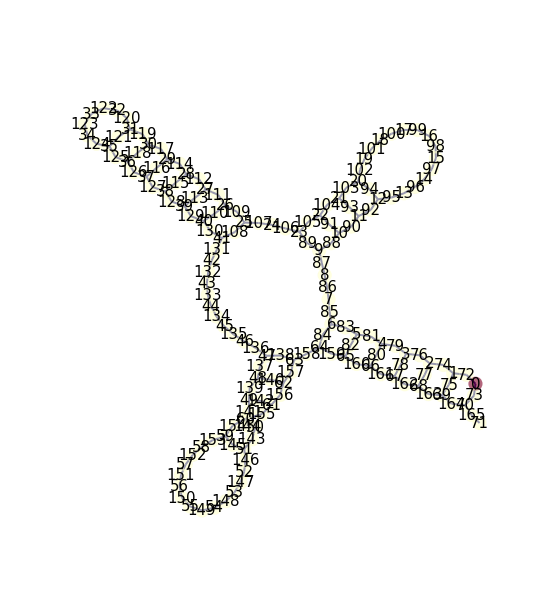

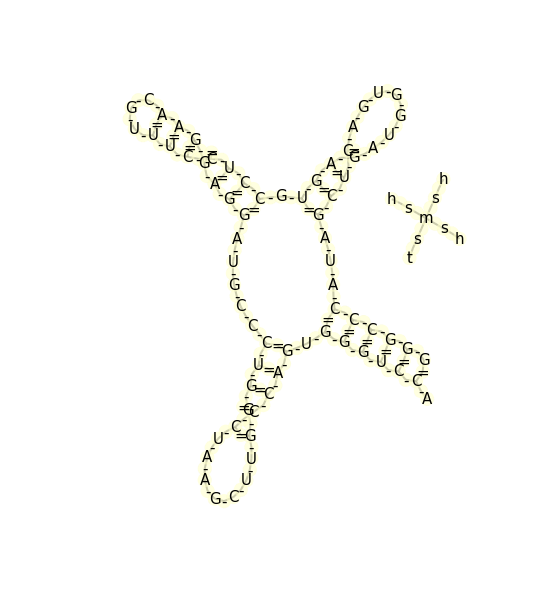

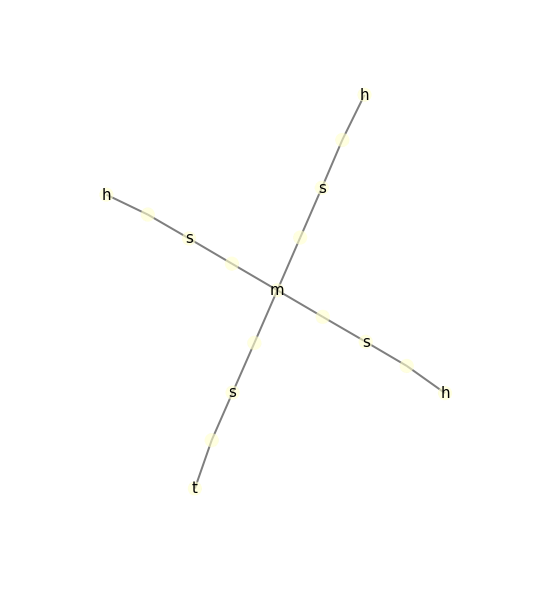

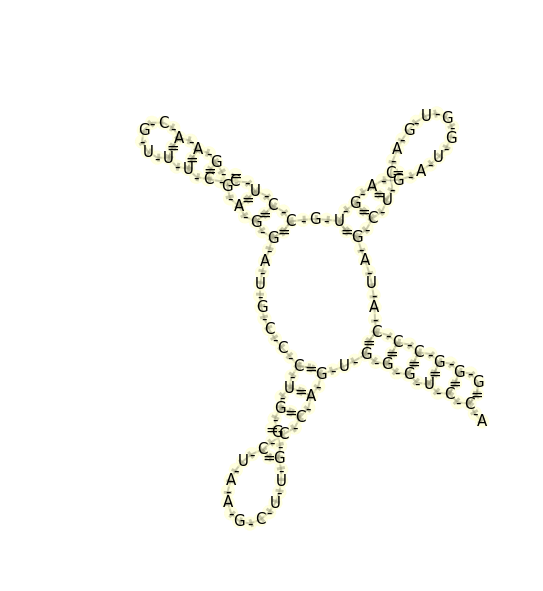

In [4]:
graphs=get_directed_graphs()
g=graphs.next()
g=graphs.next()
g=graphs.next()
g=graphs.next()
from graphlearn.utils import draw

# note: show direction doesnt work?
draw.draw_center(g,root_node=0,radius=99,show_direction=True,contract=False, size = 10,vertex_label='id')

'''
import graphlearn.abstract_graphs.rnaabstract as rnaa
g=rnaa.direct_abstraction_wrapper(g,2)
for n,d in g.nodes(data=True):
    d['contr']= str(d.get('contracted', ''))   
draw.graphlearn_draw(g, size = 10,vertex_label = 'label')
'''

import graphlearn.abstract_graphs.graphmanager as graphman
from eden.graph import Vectorizer

vectorizer=Vectorizer()
graphs=graphman.fromfasta('RF00005.fa',vectorizer)

g=graphs.next()


draw.graphlearn_draw(g.get_estimateable(), size = 10,vertex_label = 'label',contract=False)
draw.graphlearn_draw(g.get_abstract_graph(), size = 10,vertex_label = 'label',contract=False)
draw.graphlearn_draw(g.get_base_graph(), size = 10,vertex_label = 'label',contract=False)

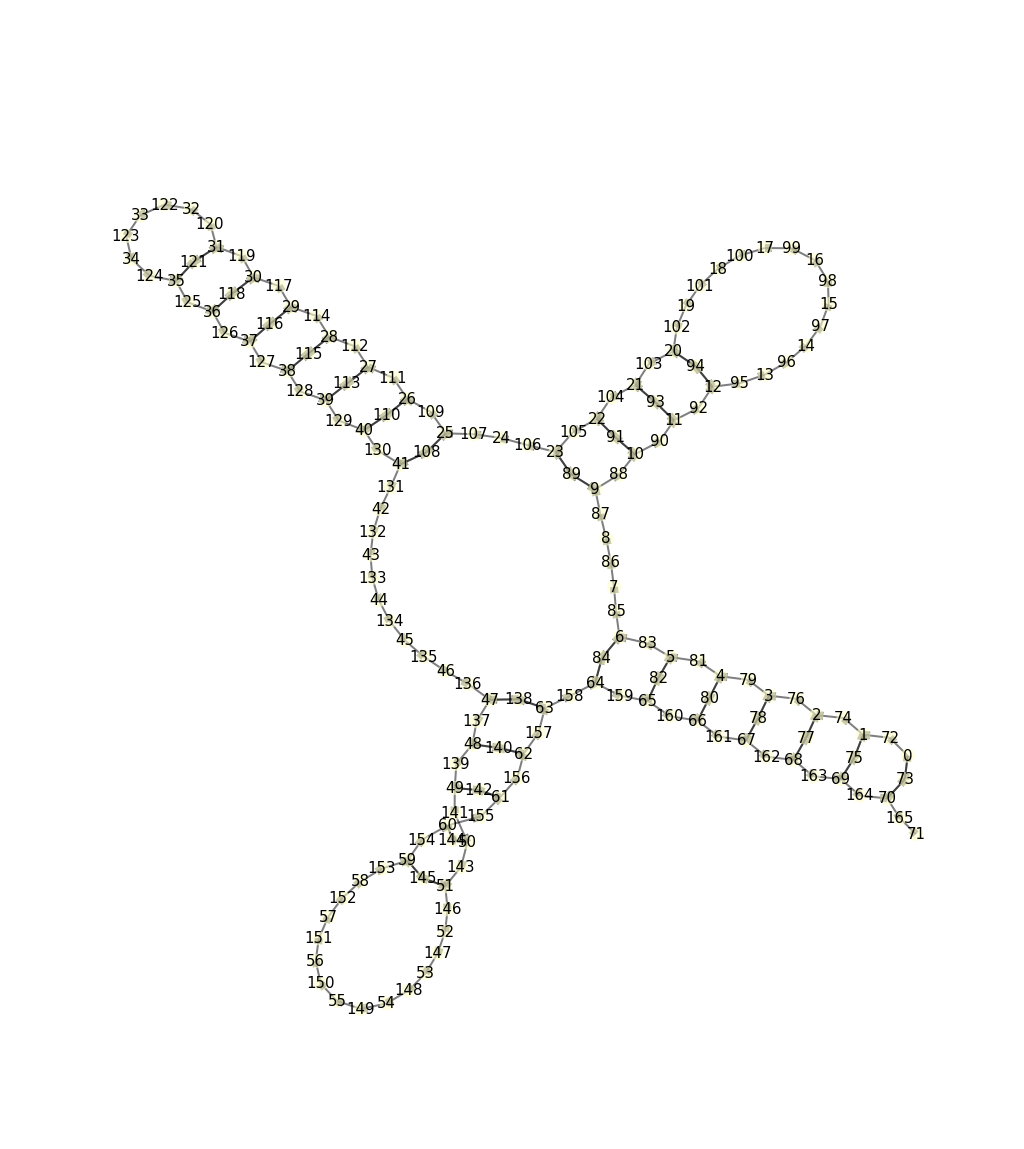

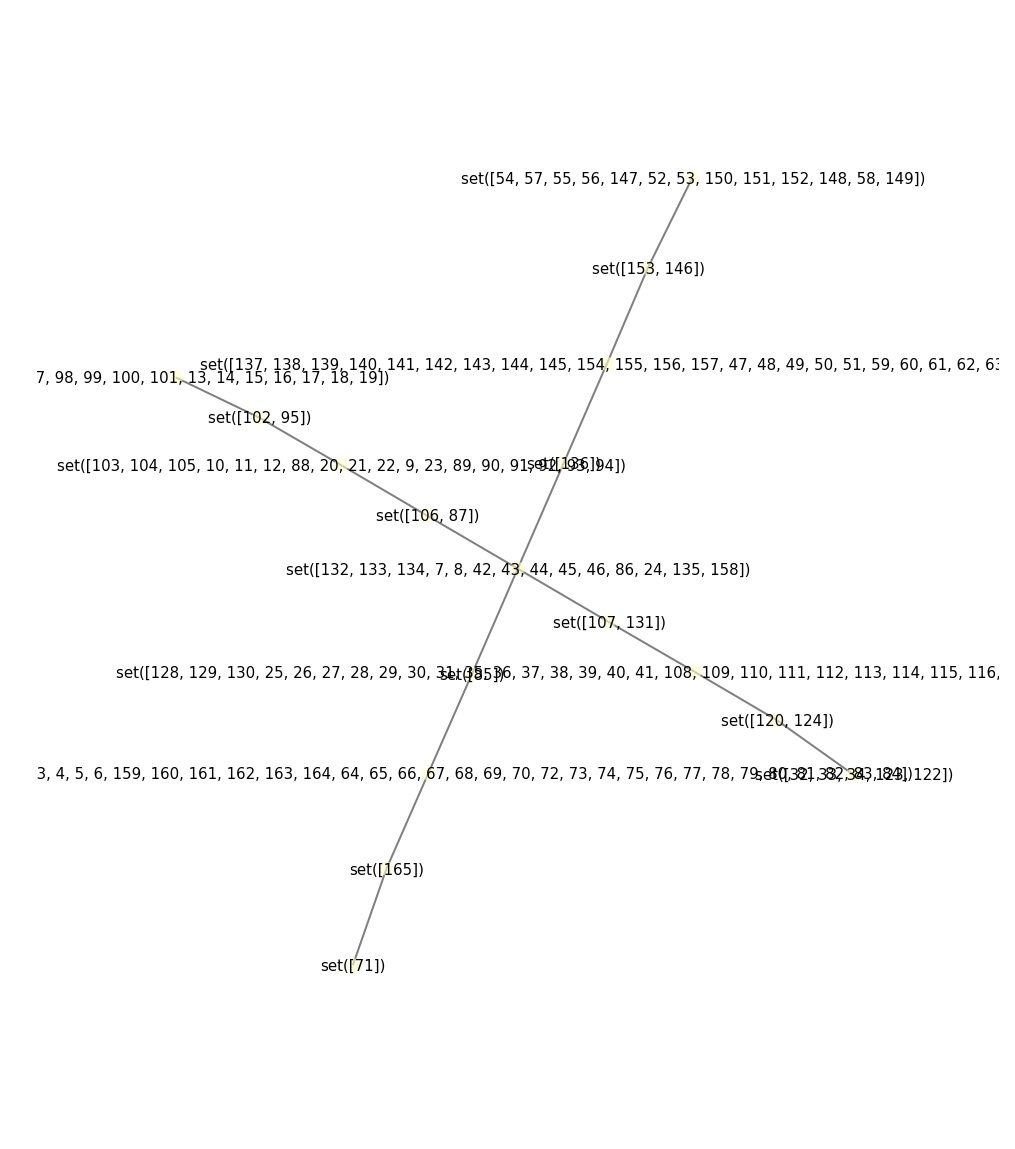

[[<graphlearn.coreinterfacepair.CoreInterfacePair instance at 0x7fe2d476a3f8>, <graphlearn.coreinterfacepair.CoreInterfacePair instance at 0x7fe2cef2c5a8>, <graphlearn.coreinterfacepair.CoreInterfacePair instance at 0x7fe2cef78758>, <graphlearn.coreinterfacepair.CoreInterfacePair instance at 0x7fe2d4395128>], [<graphlearn.coreinterfacepair.CoreInterfacePair instance at 0x7fe2cef2fe18>, <graphlearn.coreinterfacepair.CoreInterfacePair instance at 0x7fe2d40293b0>, <graphlearn.coreinterfacepair.CoreInterfacePair instance at 0x7fe2cef33320>, <graphlearn.coreinterfacepair.CoreInterfacePair instance at 0x7fe2d4029830>], [<graphlearn.coreinterfacepair.CoreInterfacePair instance at 0x7fe2d43343f8>, <graphlearn.coreinterfacepair.CoreInterfacePair instance at 0x7fe2d434d7e8>, <graphlearn.coreinterfacepair.CoreInterfacePair instance at 0x7fe2cef1bea8>, <graphlearn.coreinterfacepair.CoreInterfacePair instance at 0x7fe2d434d290>], [<graphlearn.coreinterfacepair.CoreInterfacePair instance at 0x7fe2d4

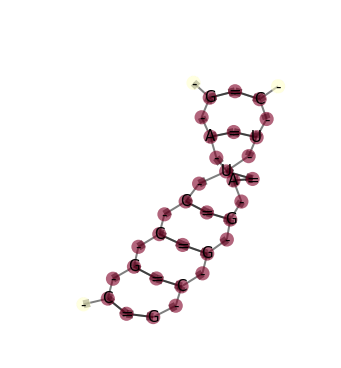

In [5]:
'''
1. MAKE SURE THAT WE CAN EXTRACT DIRECTED CIPS
'''
%matplotlib inline
from eden.converter.graph.gspan import gspan_to_eden
from graphlearn import graphtools as gt
import graphlearn.utils.draw as myutils
import eden.graph as eg
import graphlearn.graphlearn as gl
import numpy as np
import graphlearn.abstract_graphs.ubergraphlearn as ugly
#from eden.util.display import graphlearn_draw
graph=g.get_base_graph()


def mark_and_draw(cip):
    graph=myutils.cip_to_drawable_graph(cip)
    myutils.draw_graph_set_graphlearn(graph, 
                           n_graphs_per_line=7, size=5, 
                           colormap='Paired', invert_colormap=False,node_border=1,
                           vertex_alpha=0.6, edge_alpha=0.2, node_size=450)

    
    
radius_list=[0,2]
thickness_list=[2,4]
base_thickness_list=[1]
mangr=graphs.next()
myutils.graphlearn_draw(mangr.get_base_graph(),vertex_label='id',size=20)
myutils.graphlearn_draw(mangr.get_abstract_graph(),vertex_label='contracted',size=20)
argz=(mangr,radius_list,thickness_list,Vectorizer(),2**20-1,lambda x,y:True, base_thickness_list)


cips=ugly.extract_cores_and_interfaces_mk2(argz)

'''
def extract_cores_and_interfaces_mk2(parameters):
    # happens if batcher fills things up with null
    if parameters[0] is None:
        return None
    try:
        # unpack arguments, expand the graph
        graphmanager, radius_list, thickness_list, vectorizer, hash_bitmask, node_entity_check, base_thickness_list = parameters
'''
print cips
#mark_and_draw(cip)
myutils.graphlearn_draw(cips[0][0].graph, contract=False)
#myutils.graphlearn_draw(cips[0].graph,edge_label=None)

In [6]:
%%time
'''
TRAINING GRAMMAR
'''
import os 
os.nice(20)
%matplotlib inline
import graphlearn.utils.draw as myutils
import graphlearn.abstract_graphs.rnasampler as rspl
import graphlearn.abstract_graphs.rnaabstract as rnaa
import itertools
import graphlearn.localsubstitutablegraphgrammar as grammar
import graphlearn.abstract_graphs.graphmanager as graphman

sampler=rspl.RNASampler(radius_list=[0,1],thickness_list=[1],base_thickness_list=[1], min_cip_count=1, min_interface_count=2, postprocessor=rnaa.ForgiPostprocessor())
graphs=graphman.fromfasta('RF00005.fa',sampler.vectorizer)
graphs=itertools.islice(graphs,100)
sampler.fit(graphs,n_jobs=1,batch_size=1)
sampler.save('tmp/rna_ubergrammar.ge')


Classifier:
SGDClassifier(alpha=0.000981975557728, average=False, class_weight=None,
       epsilon=0.1, eta0=0.762269803813, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='log', n_iter=92, n_jobs=1,
       penalty='elasticnet', power_t=0.918897167, random_state=None,
       shuffle=True, verbose=0, warm_start=False)

Predictive performance:
            accuracy: 1.000 +- 0.000
           precision: 1.000 +- 0.000
              recall: 1.000 +- 0.000
                  f1: 1.000 +- 0.000
   average_precision: 1.000 +- 0.000
             roc_auc: 1.000 +- 0.000
#instances: 100  #interfaces: 216   #cores: 1223   #core-interface-pairs: 1313
Saved model: tmp/rna_ubergrammar.ge
CPU times: user 1min 24s, sys: 6.19 s, total: 1min 30s
Wall time: 2min 20s


interface id: 895847 [55 options]


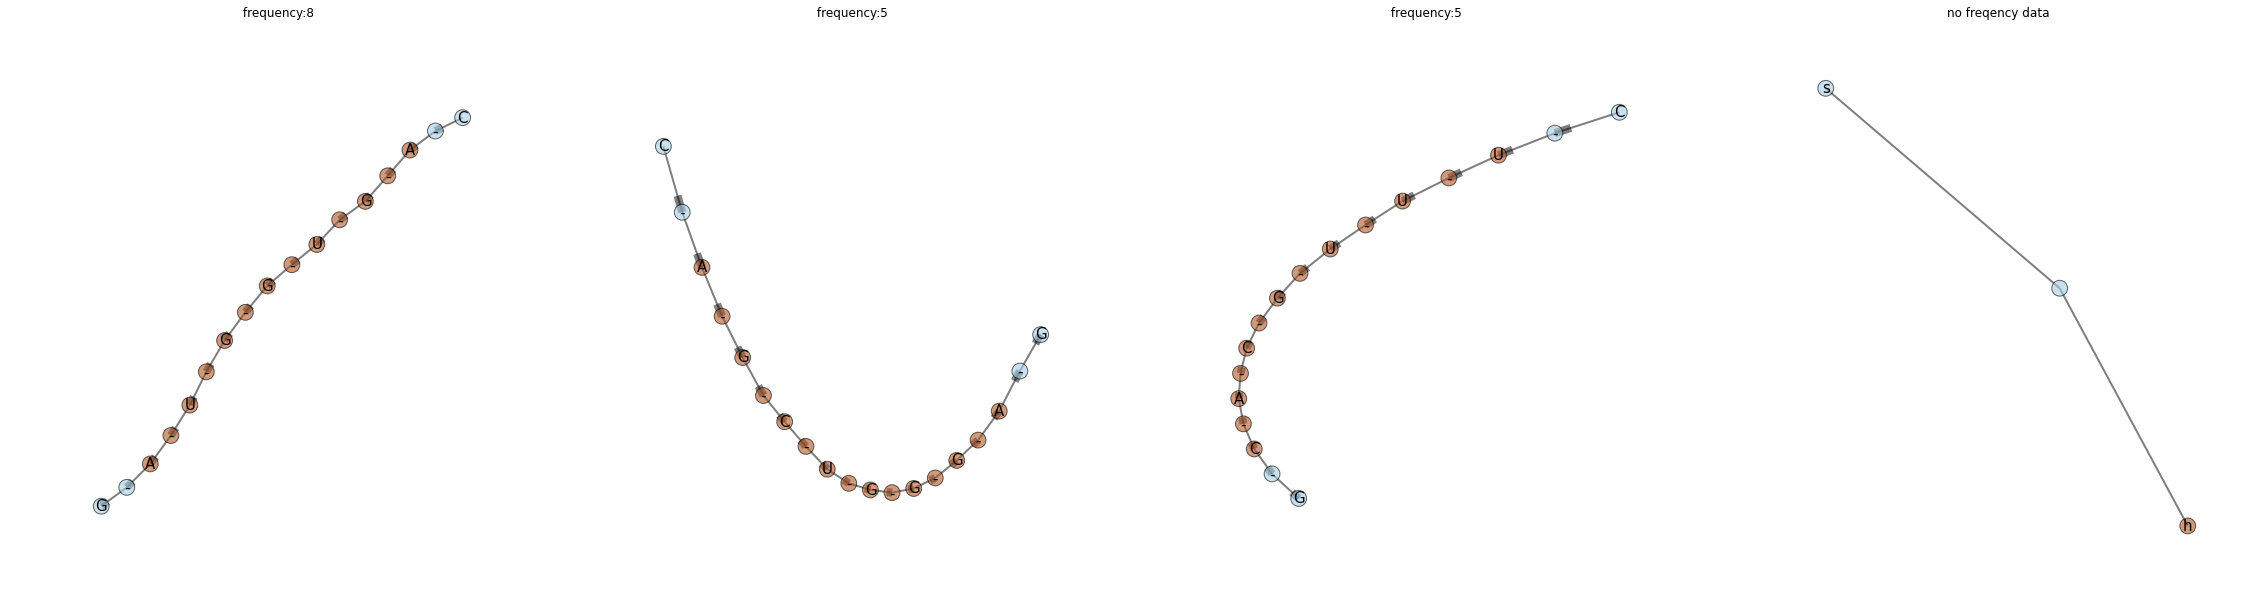

interface id: 829207 [46 options]


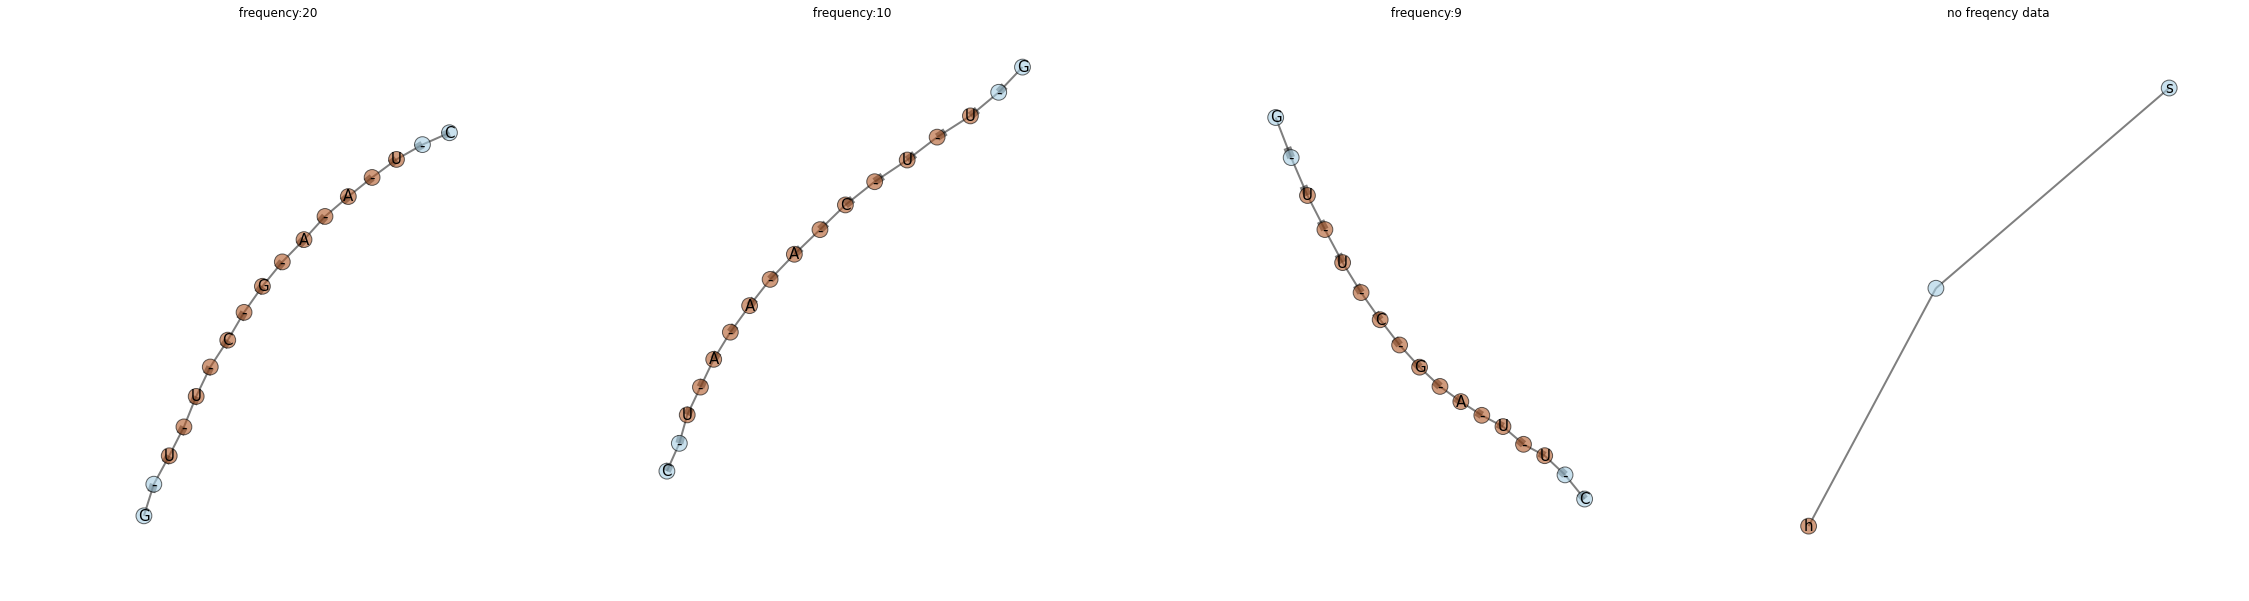

interface id: 508438 [46 options]


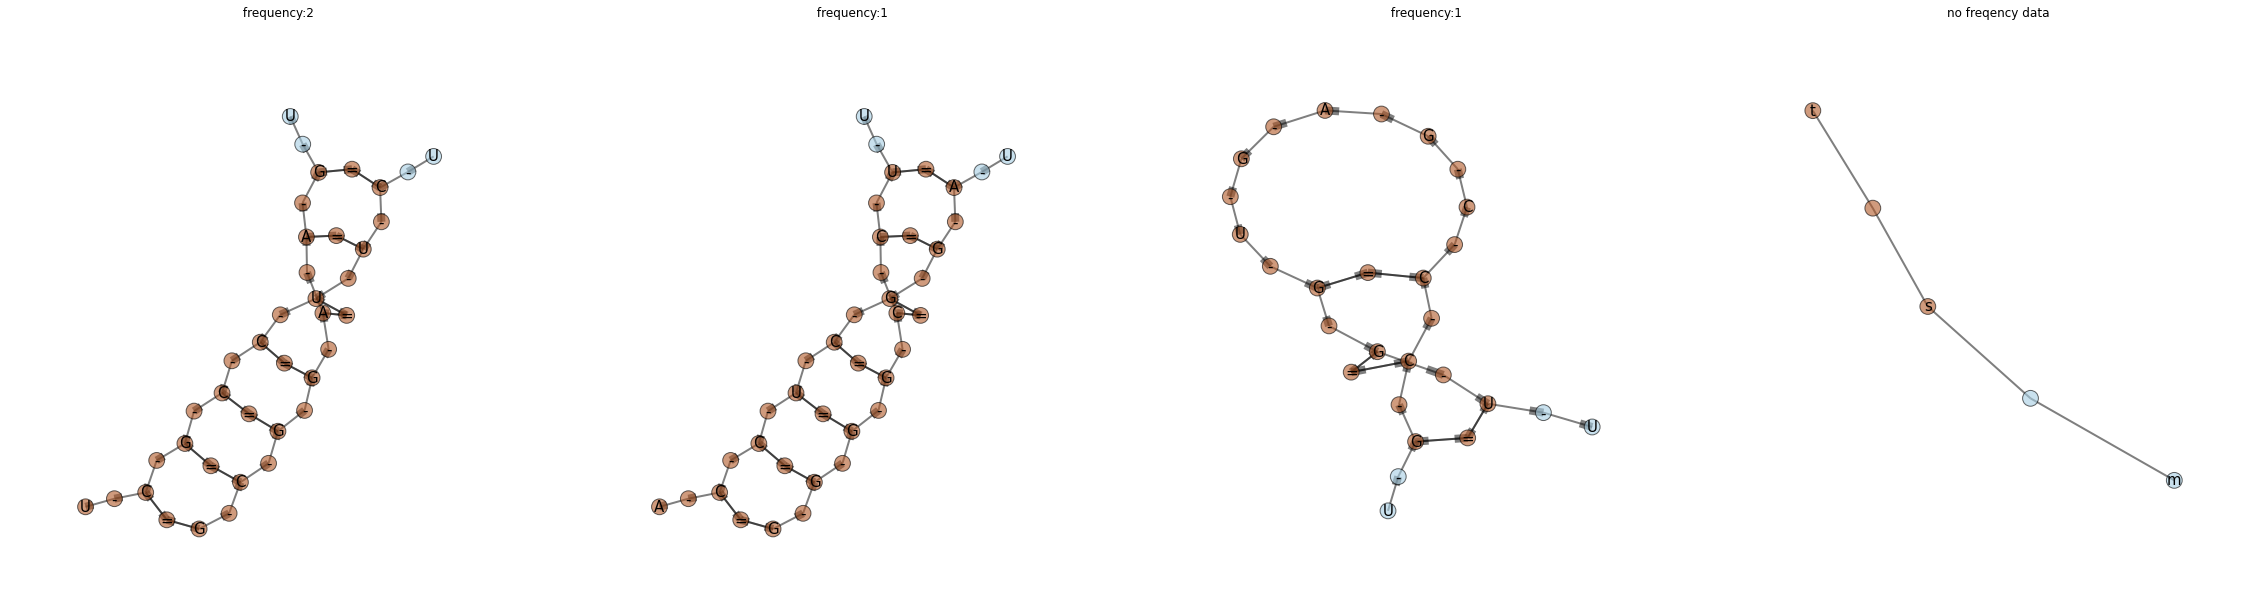

interface id: 158444 [46 options]


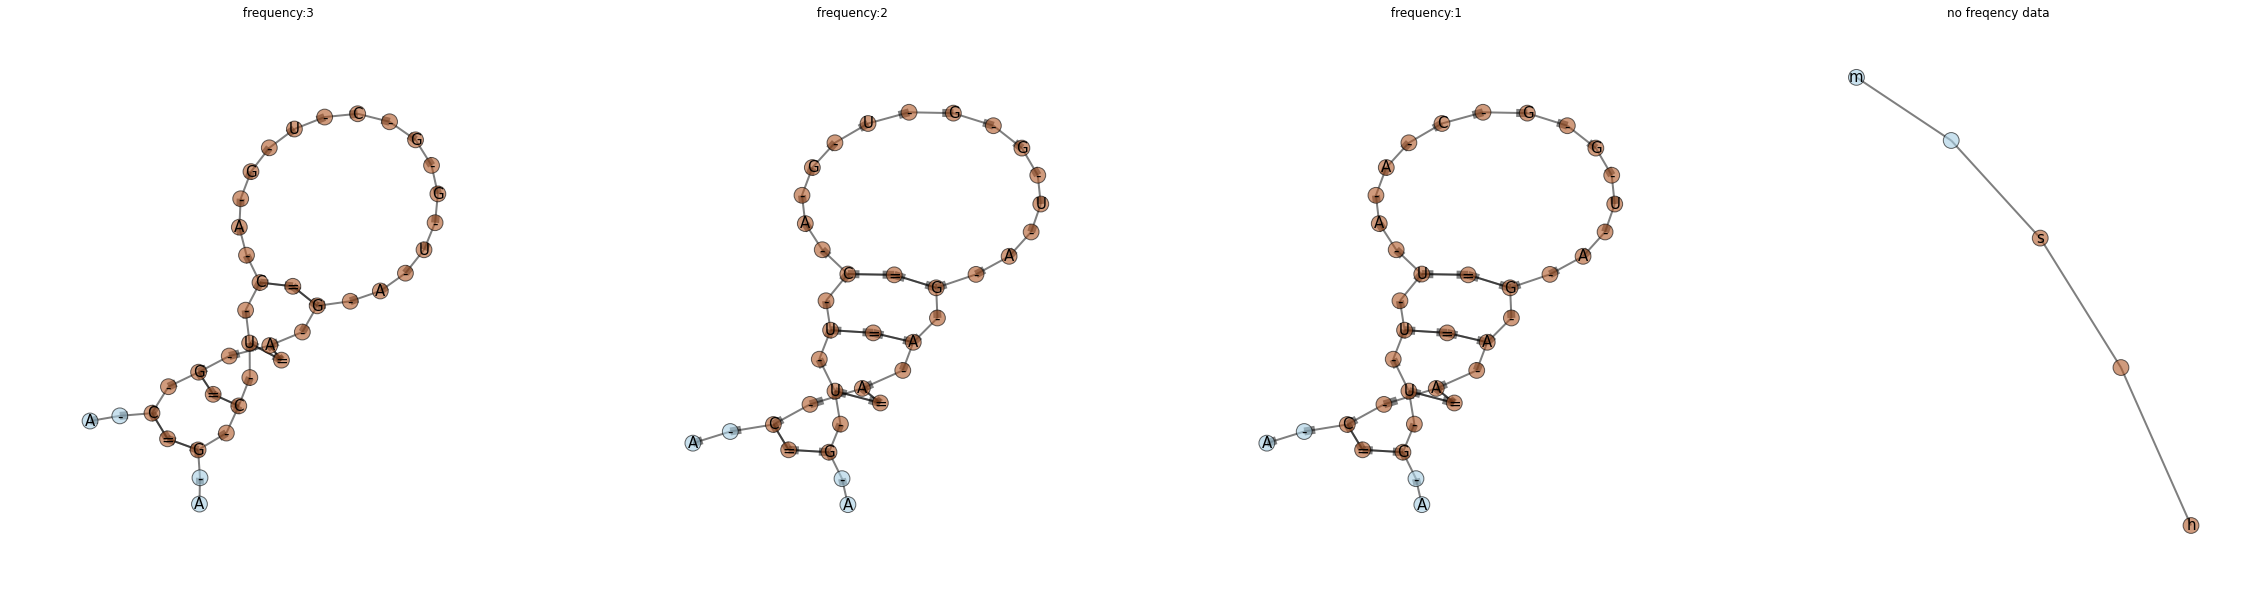

interface id: 782547 [45 options]


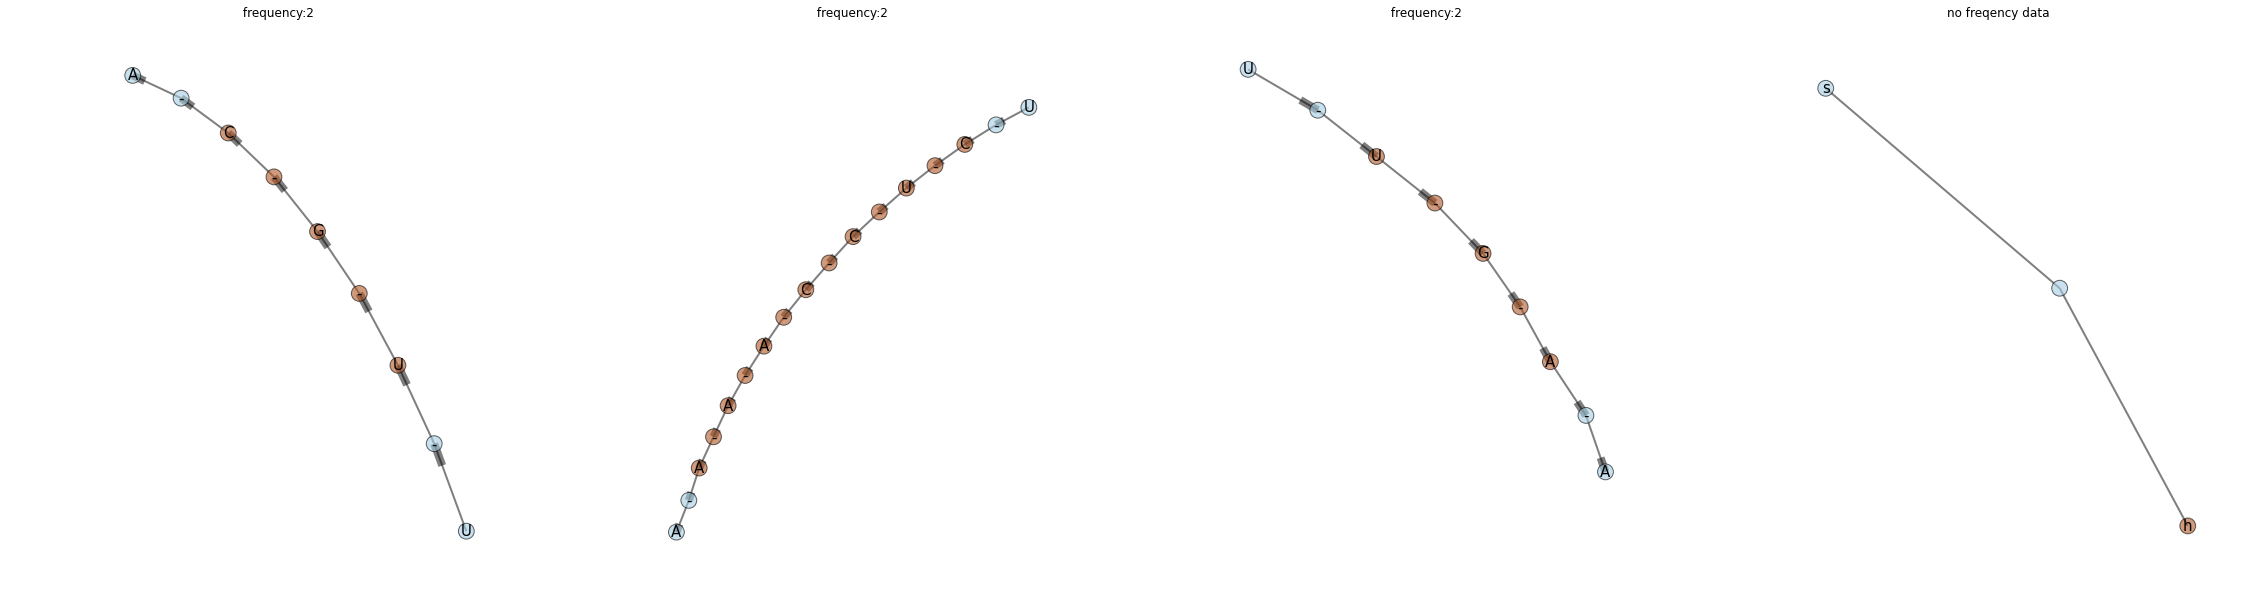

interface id: 772946 [42 options]


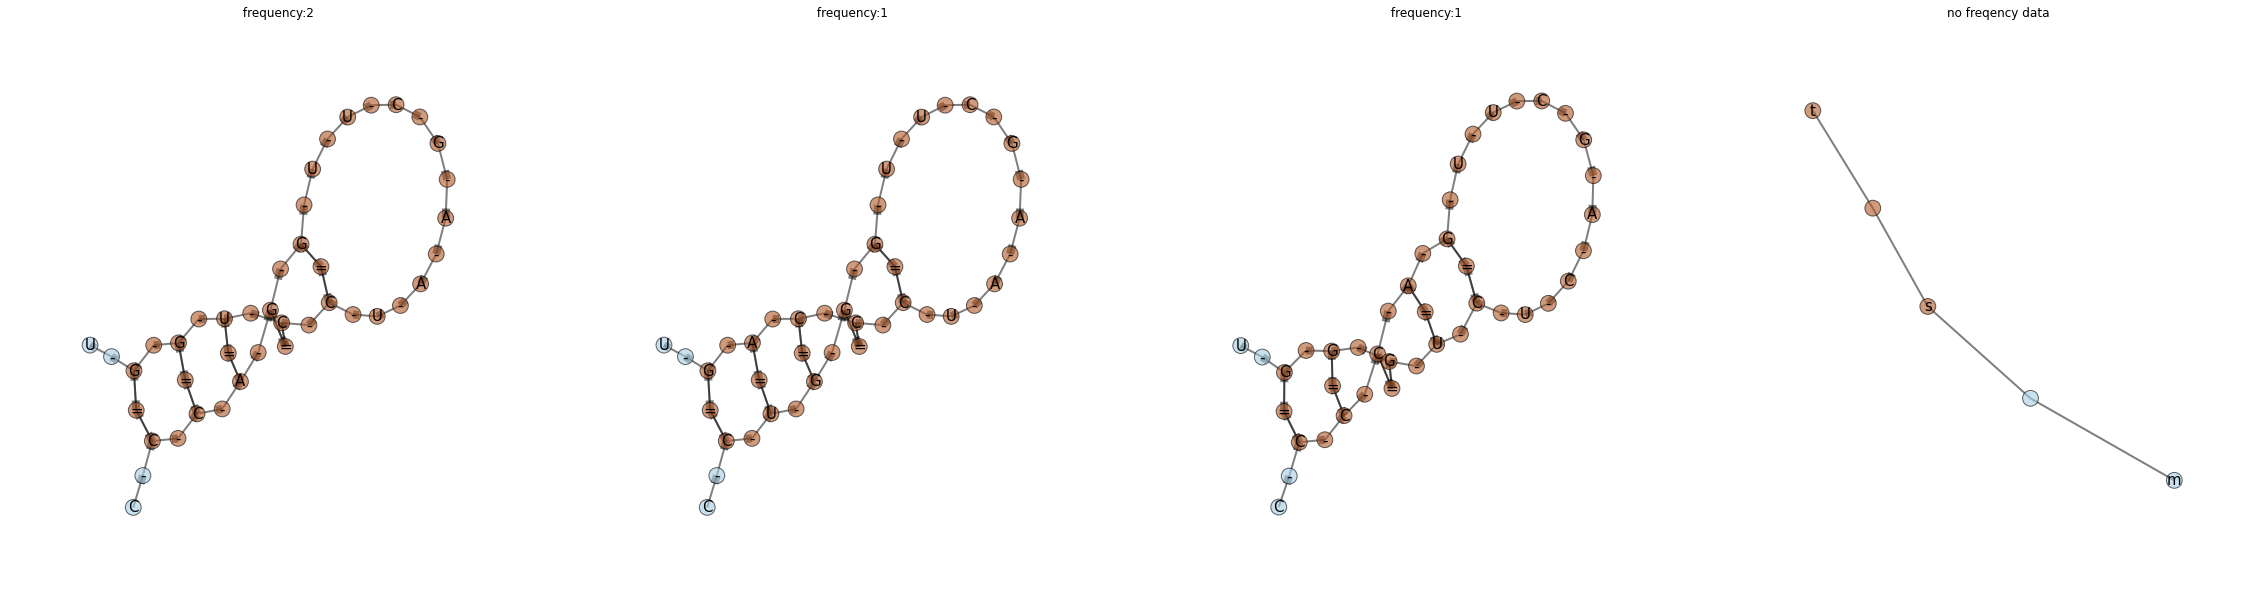

interface id: 1021485 [40 options]


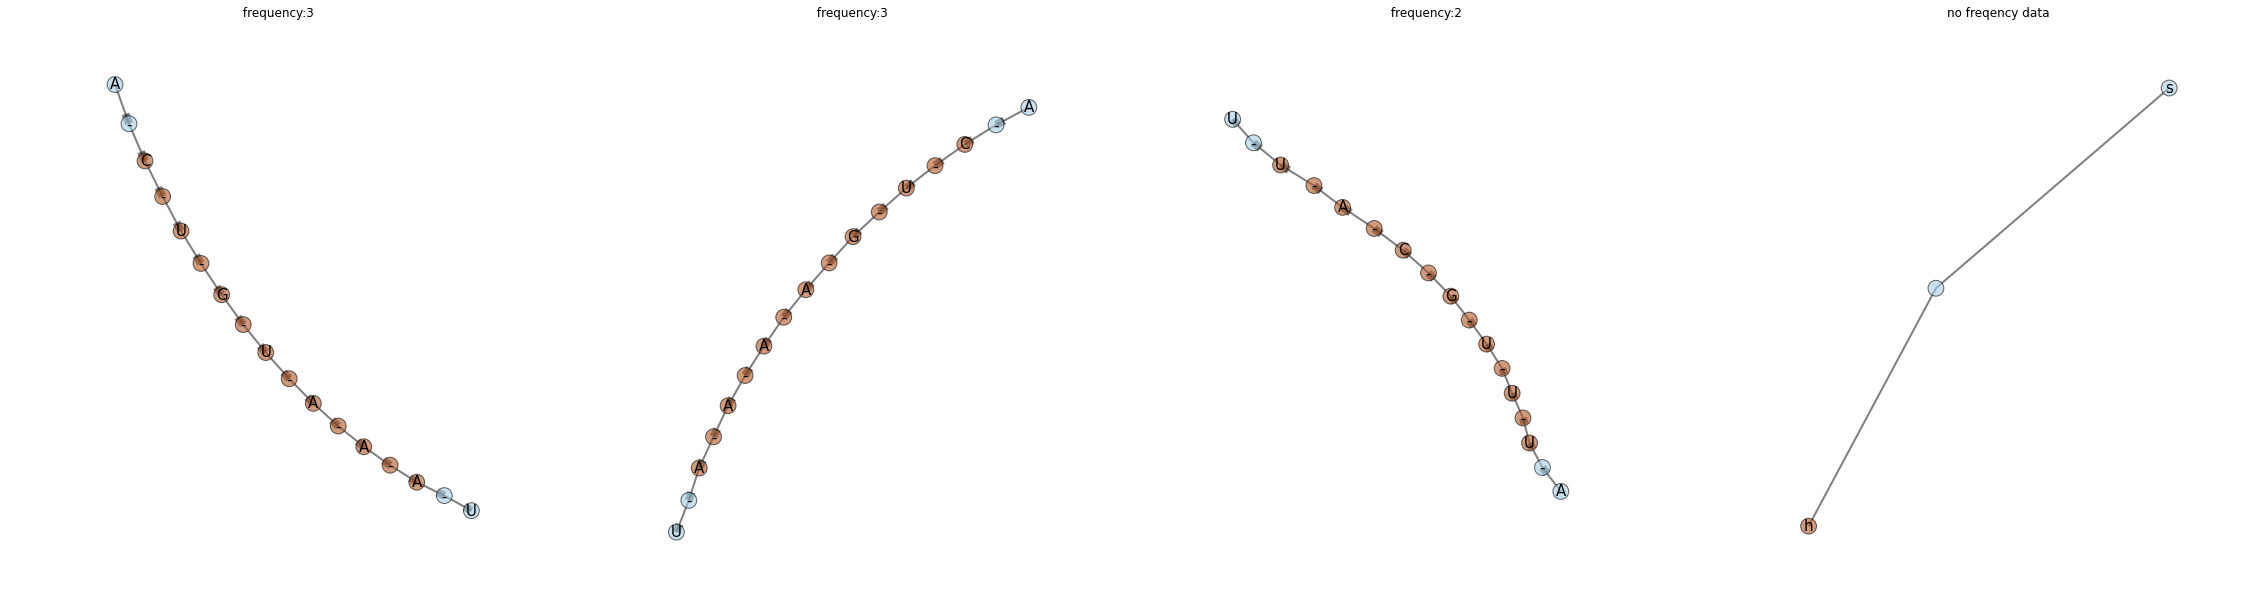

interface id: 429596 [35 options]


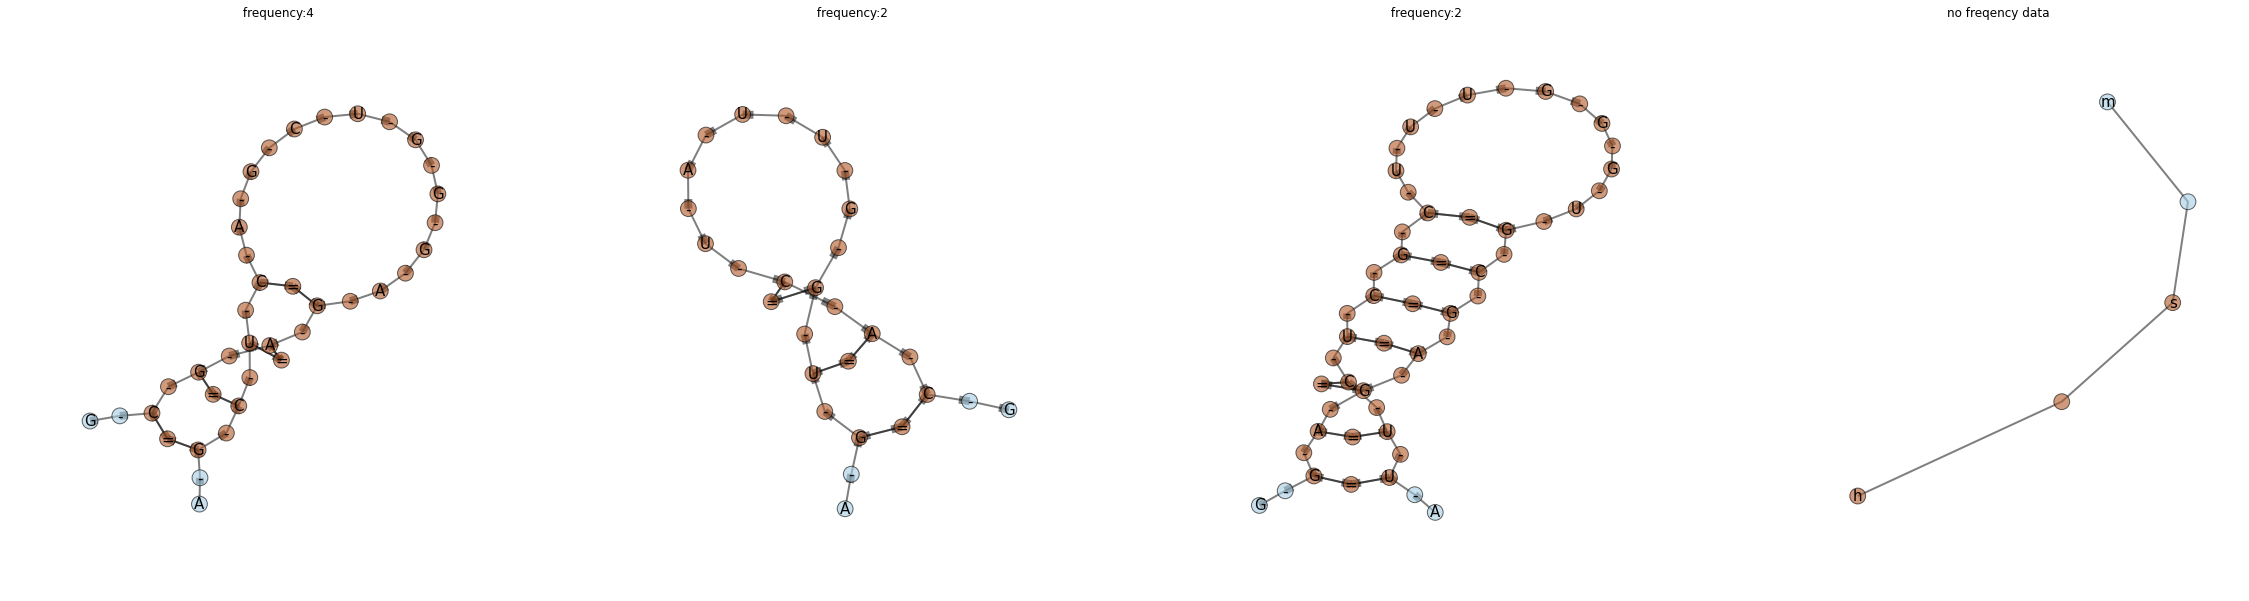

interface id: 768372 [32 options]


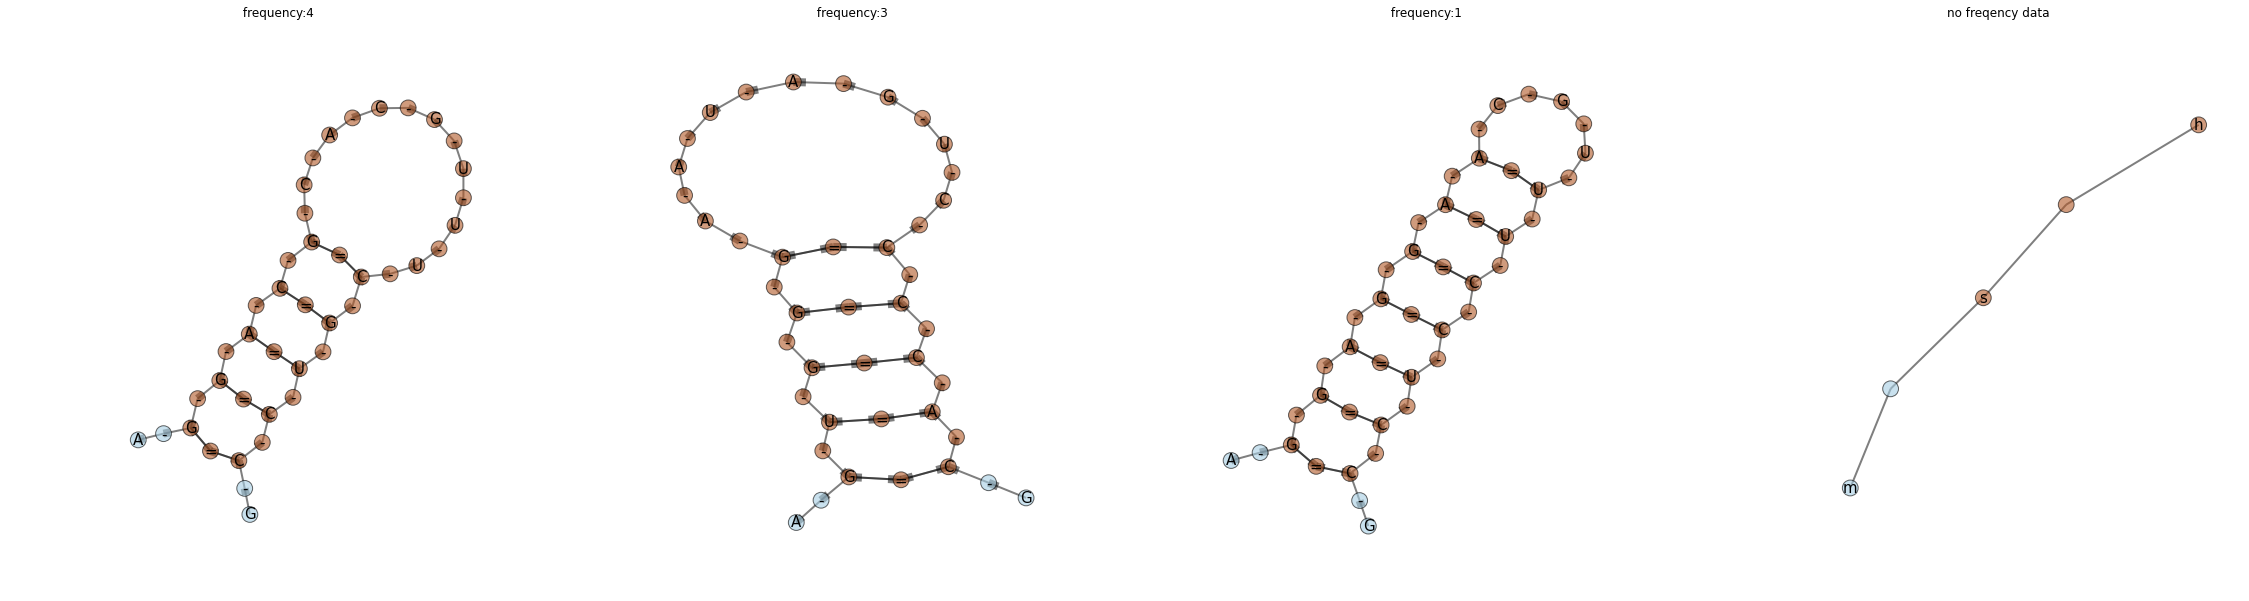

interface id: 84584 [28 options]


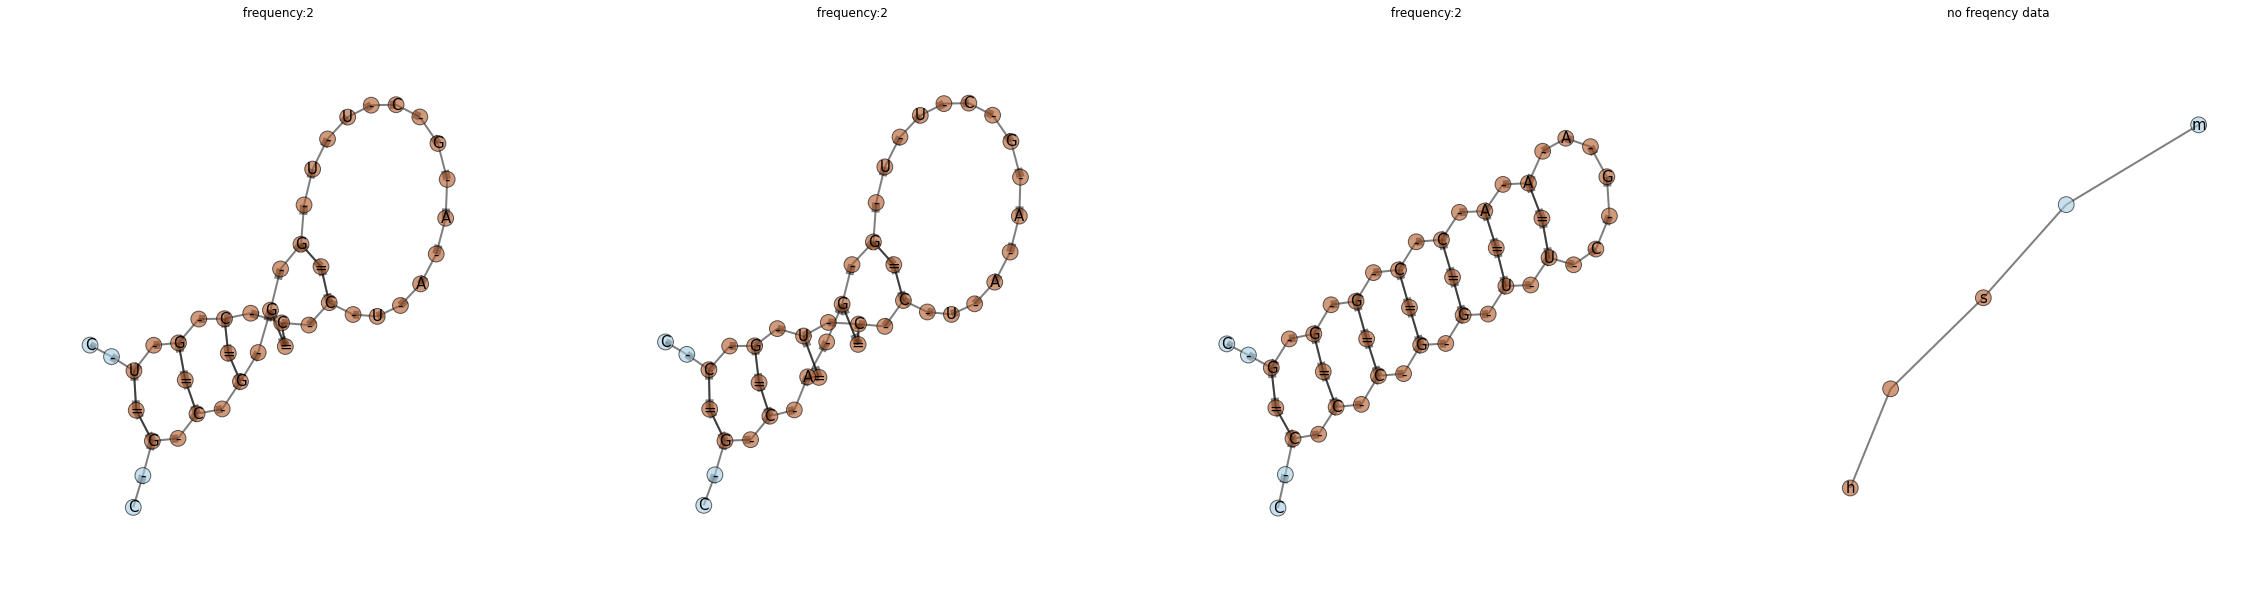

interface id: 150508 [24 options]


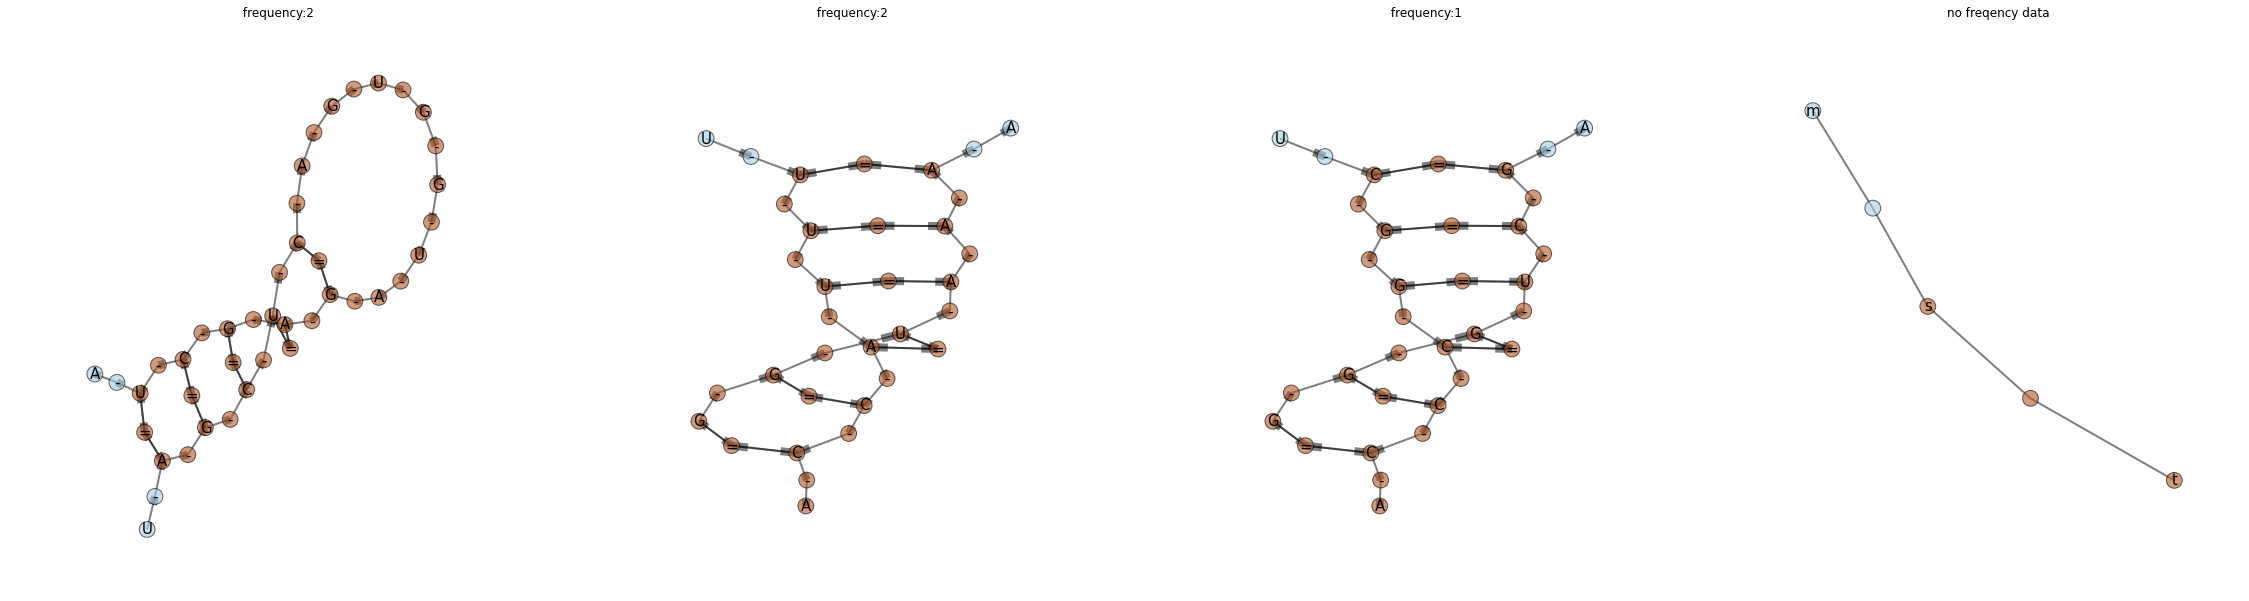

interface id: 439600 [22 options]


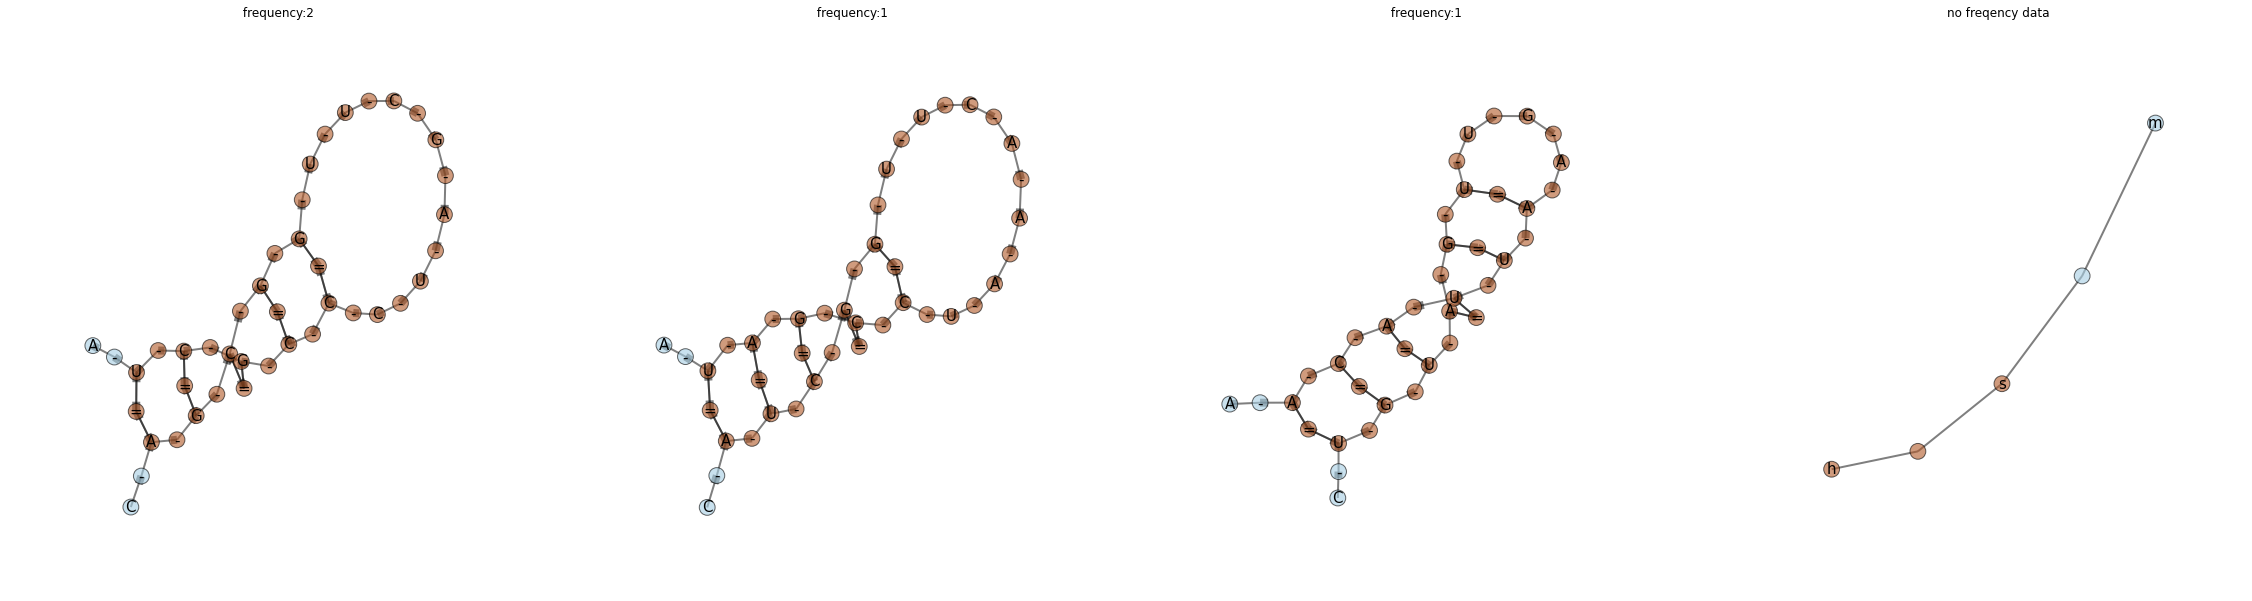

interface id: 75299 [20 options]


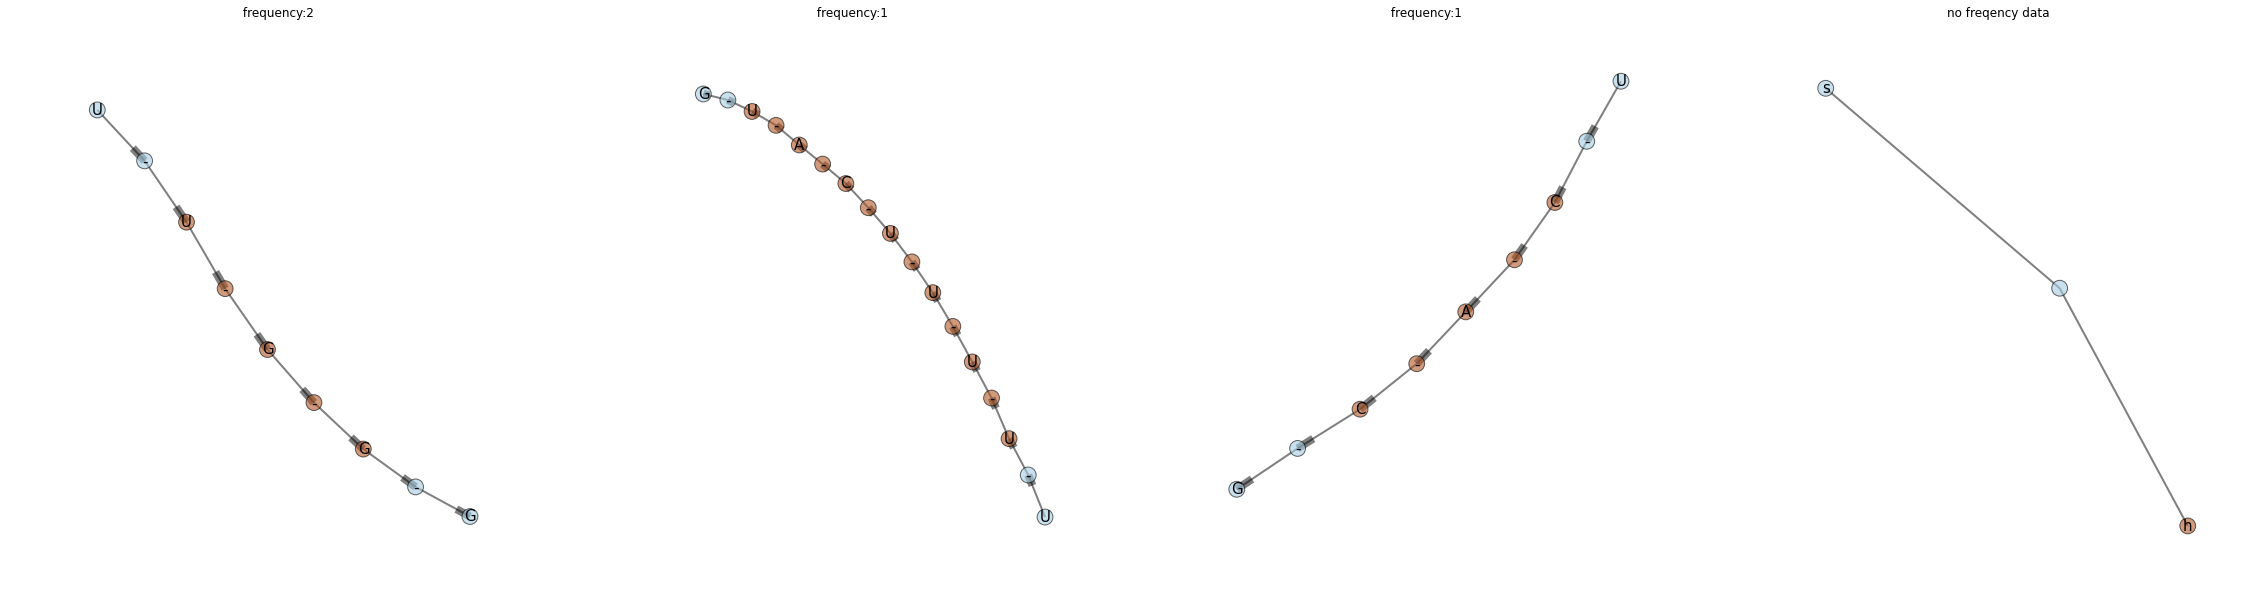

interface id: 616627 [18 options]


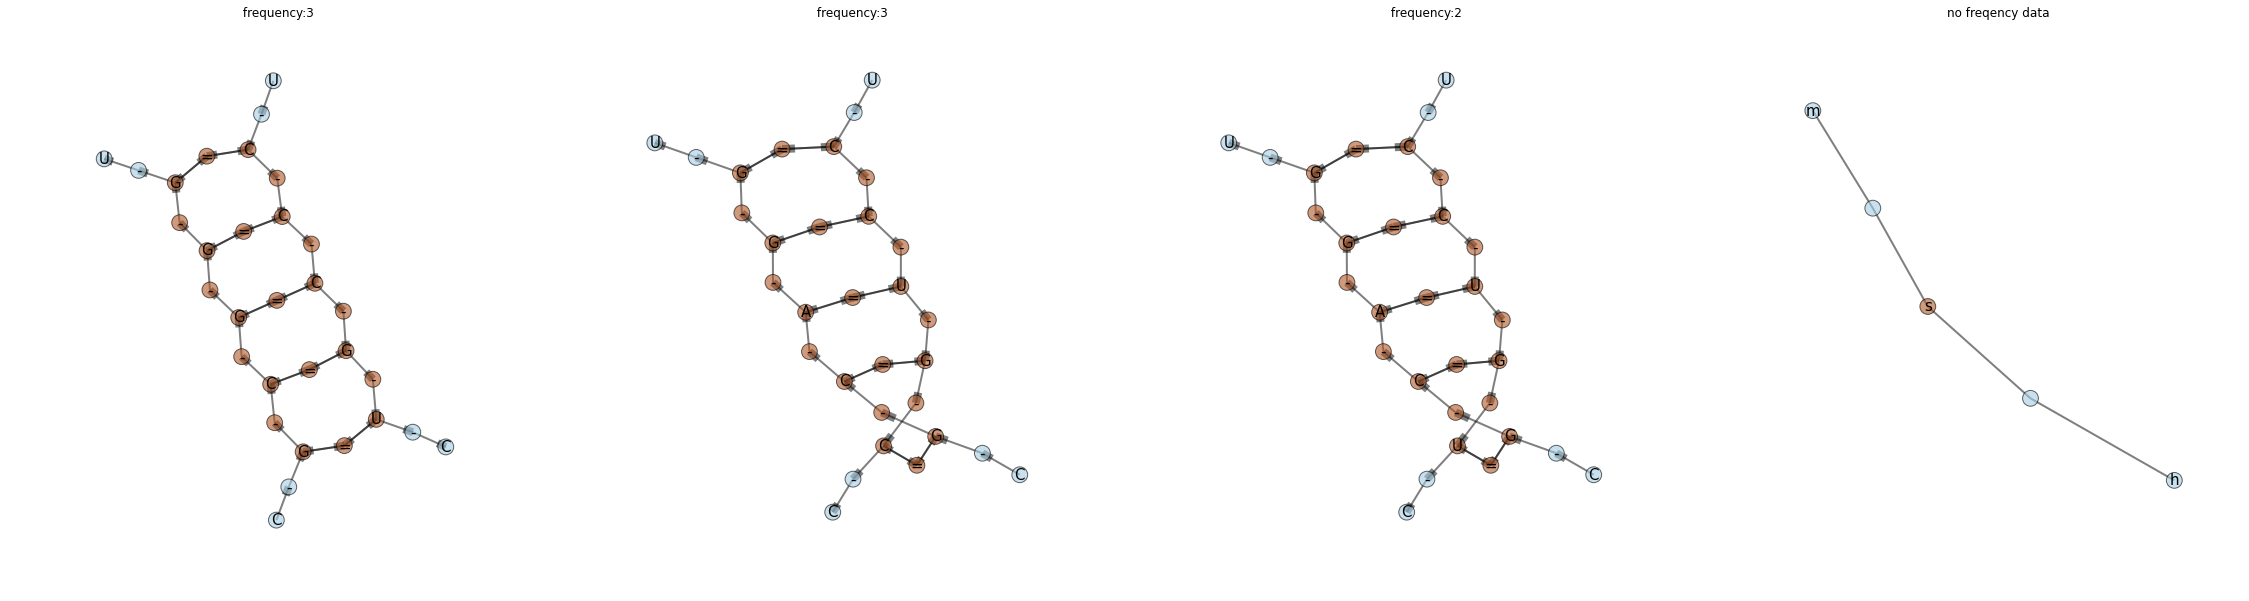

interface id: 323441 [18 options]


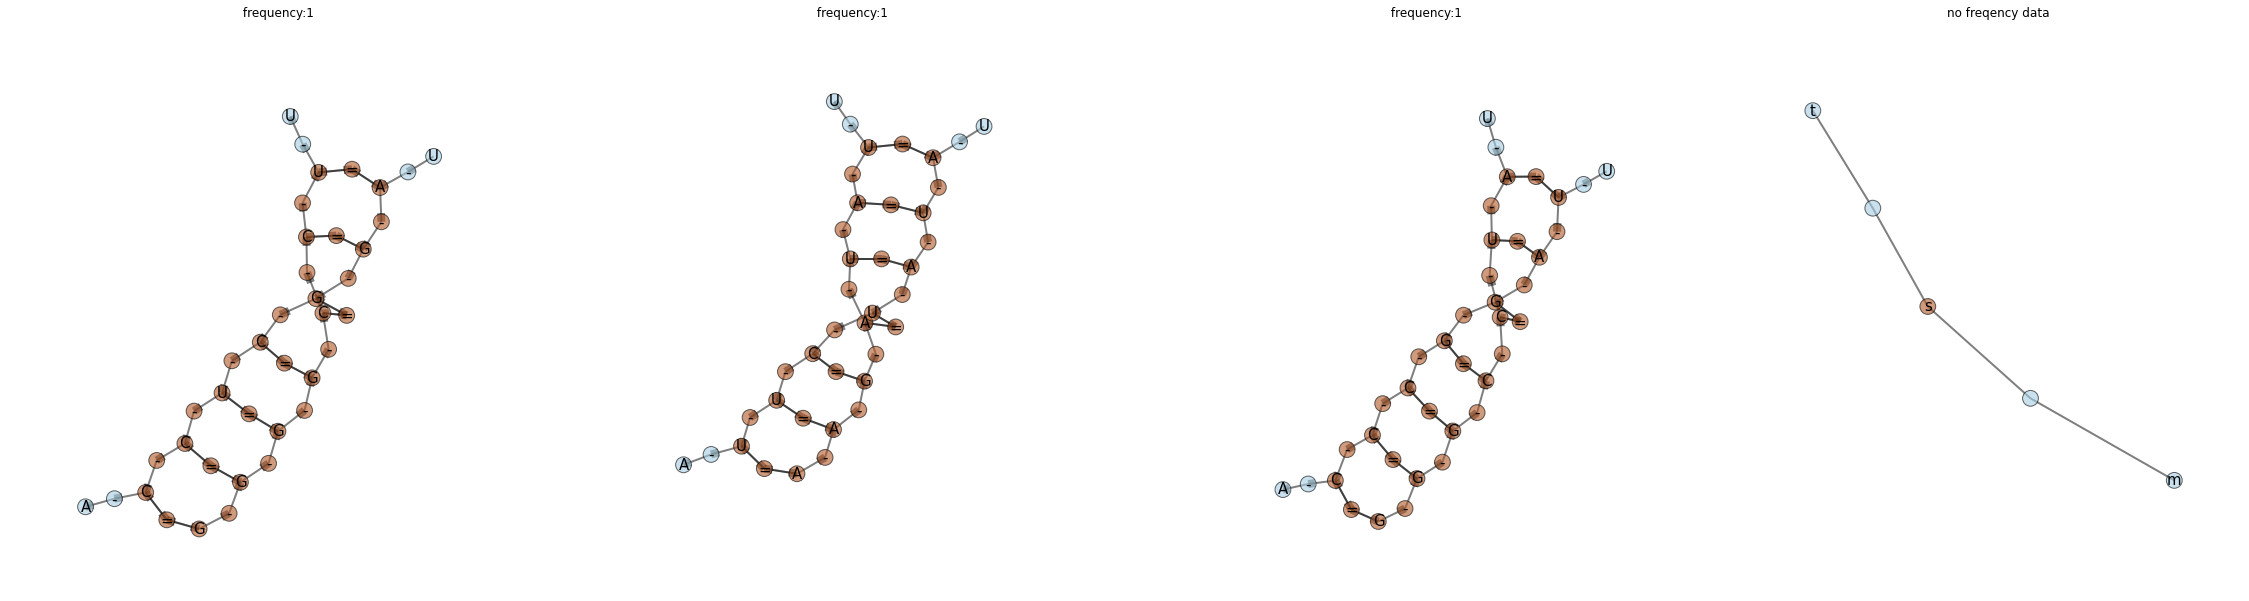

interface id: 936143 [15 options]


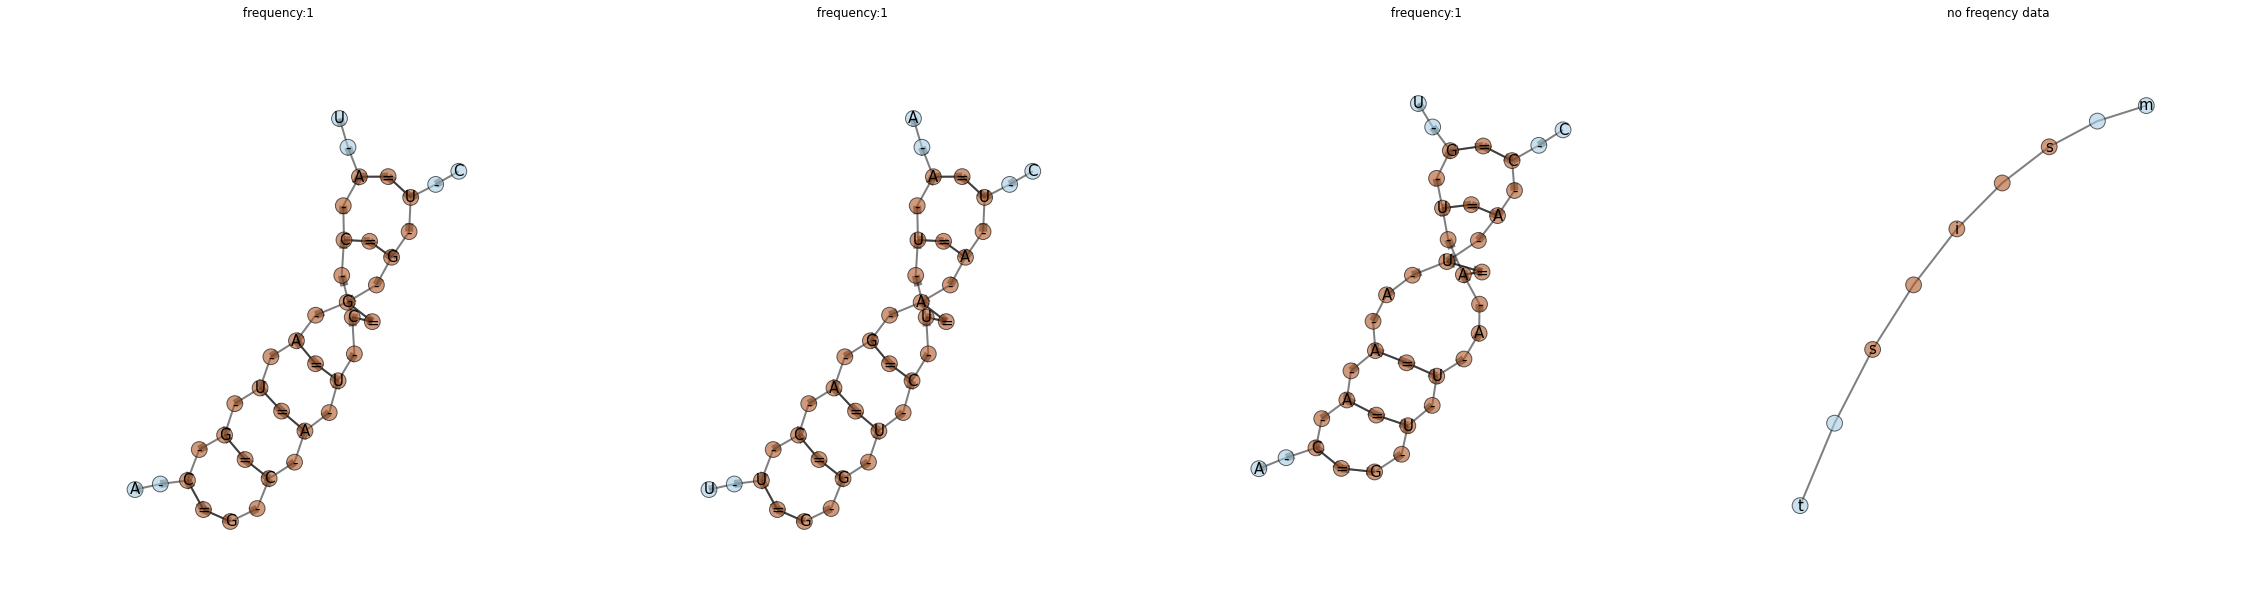

interface id: 826901 [15 options]


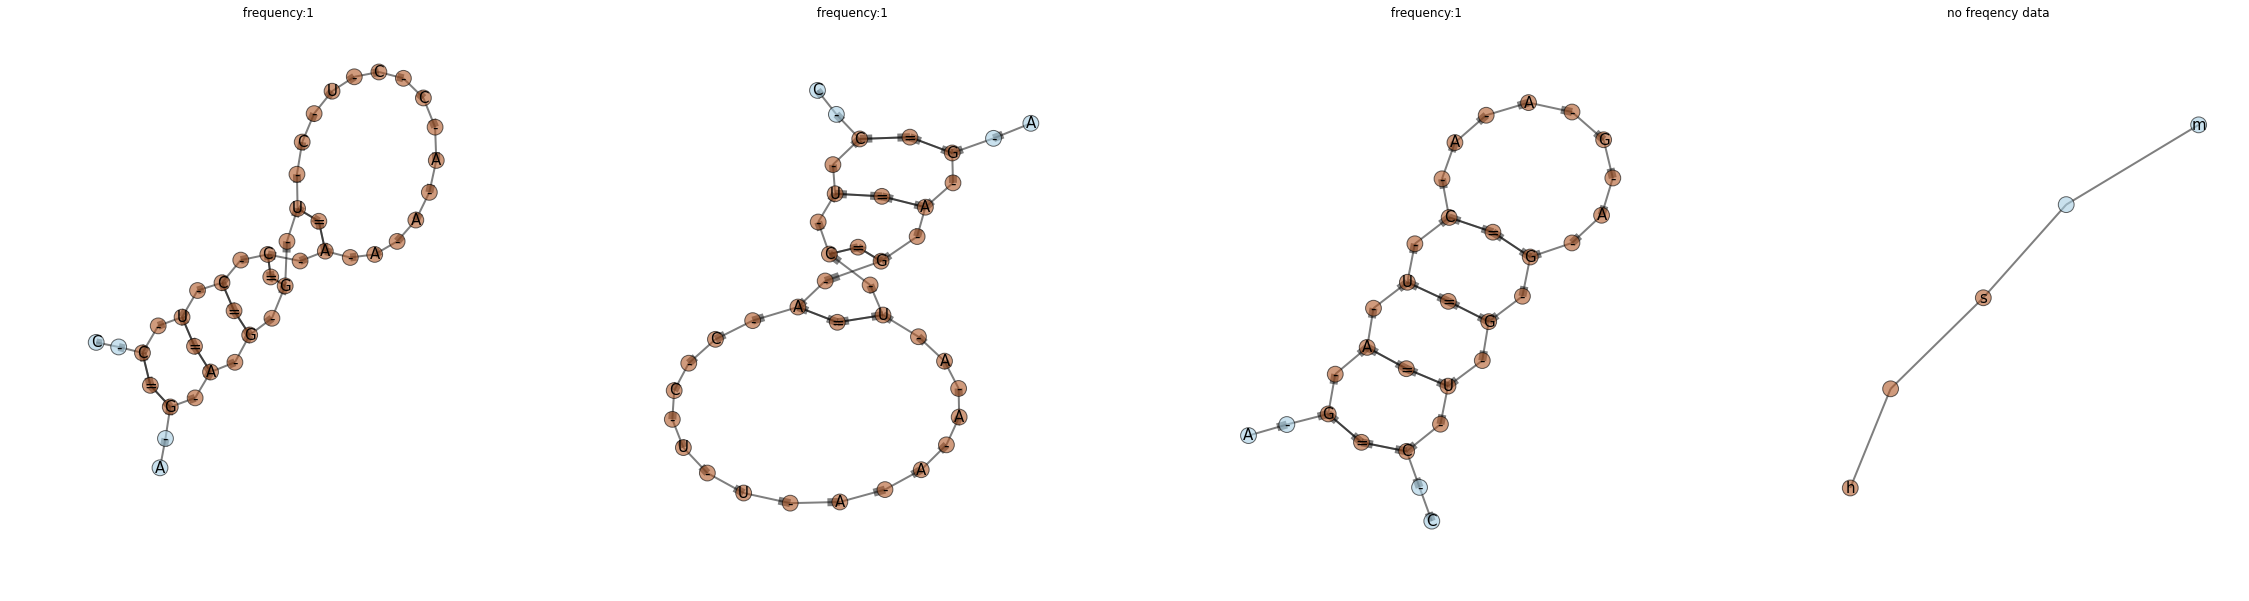

interface id: 432532 [13 options]


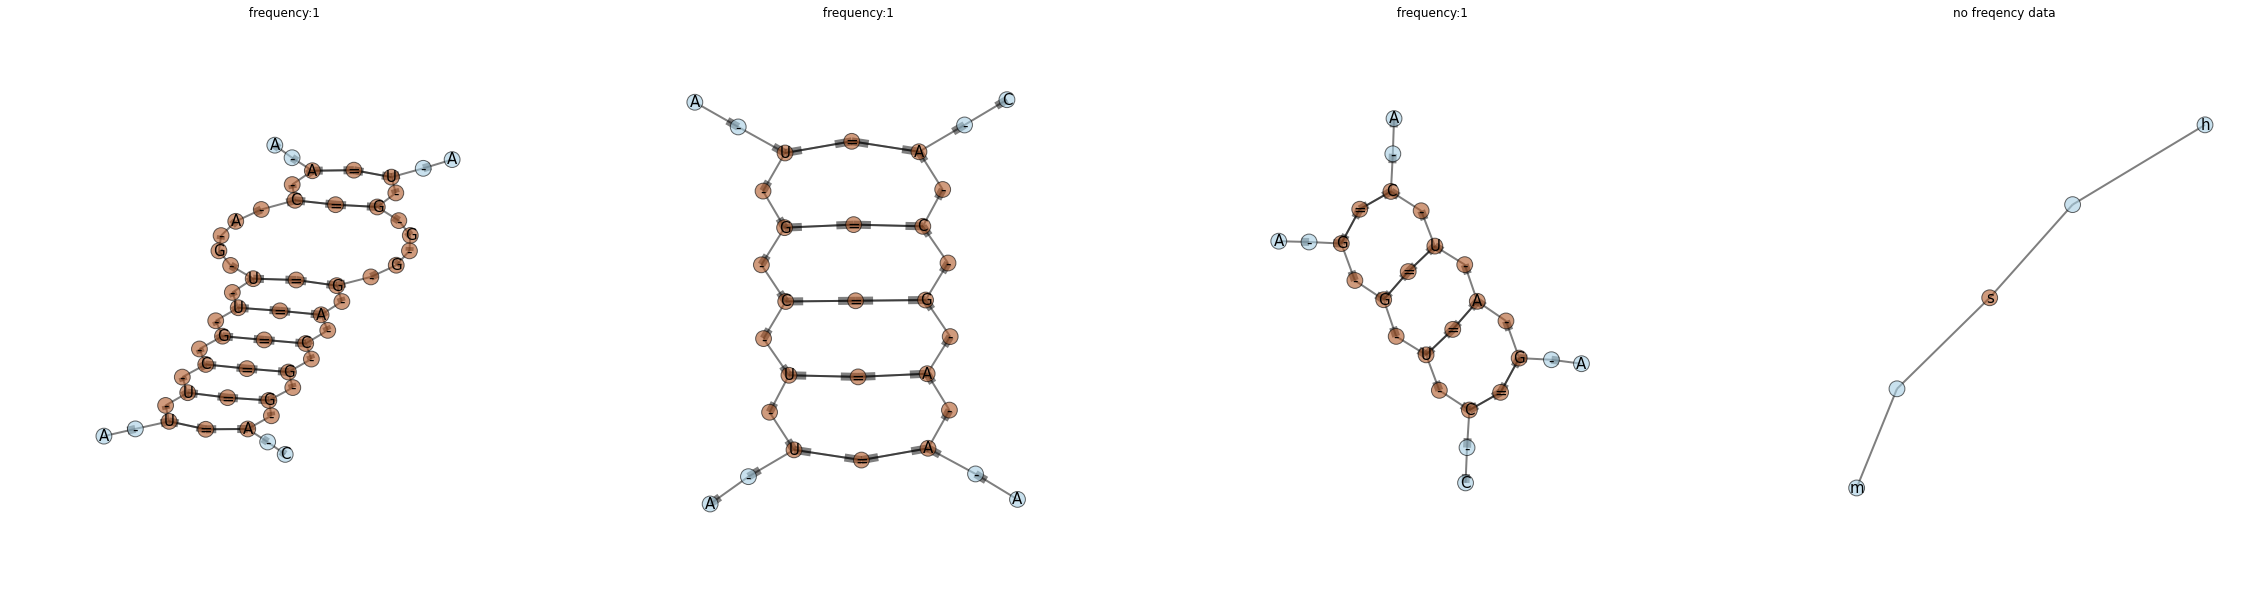

interface id: 46144 [13 options]


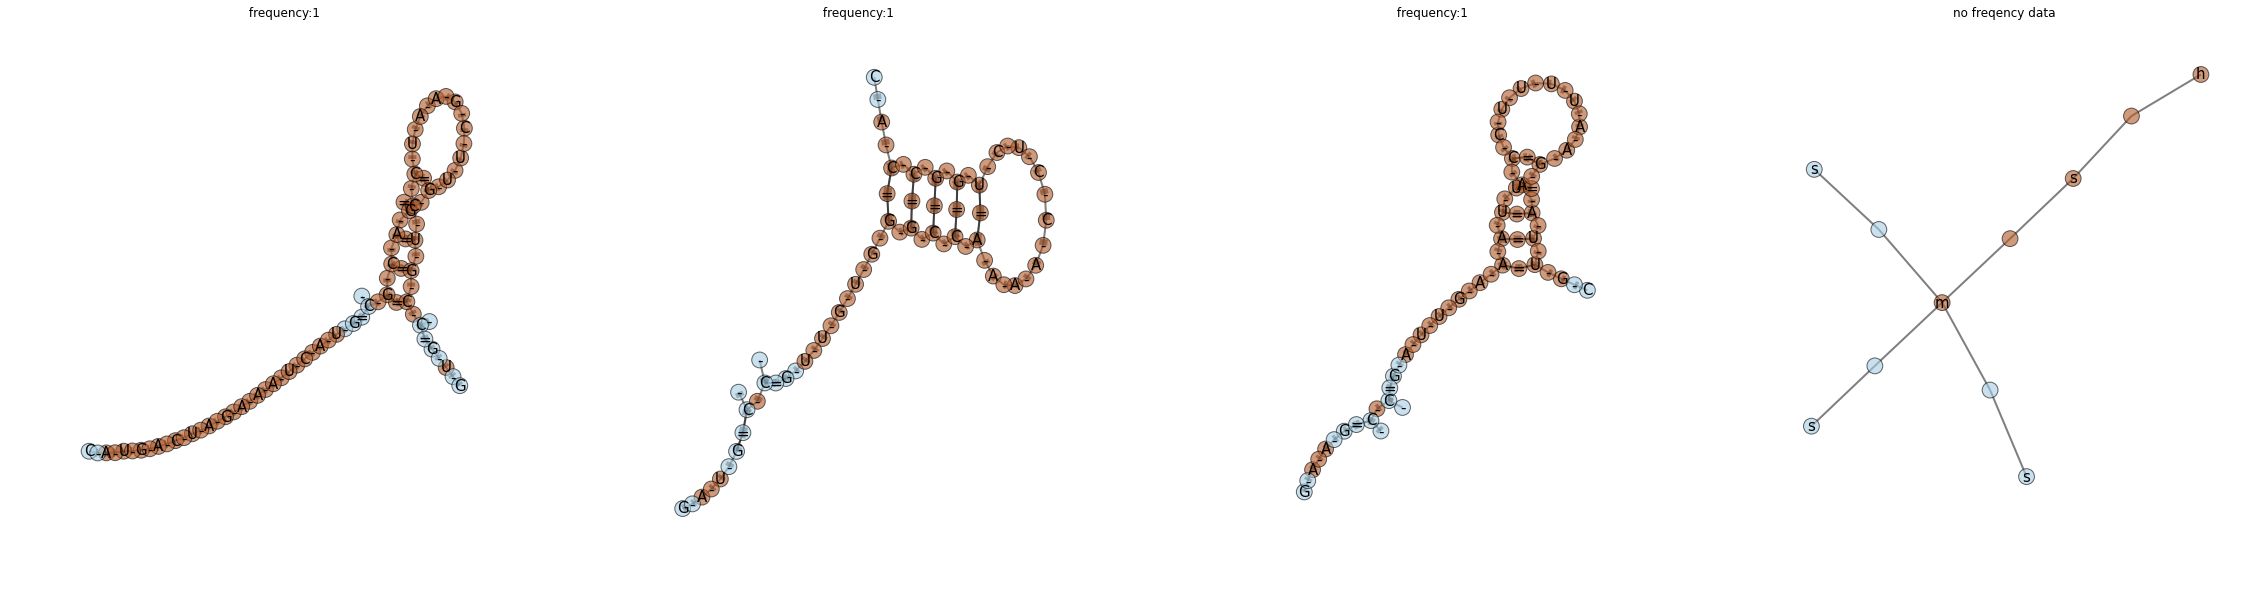

interface id: 835349 [12 options]


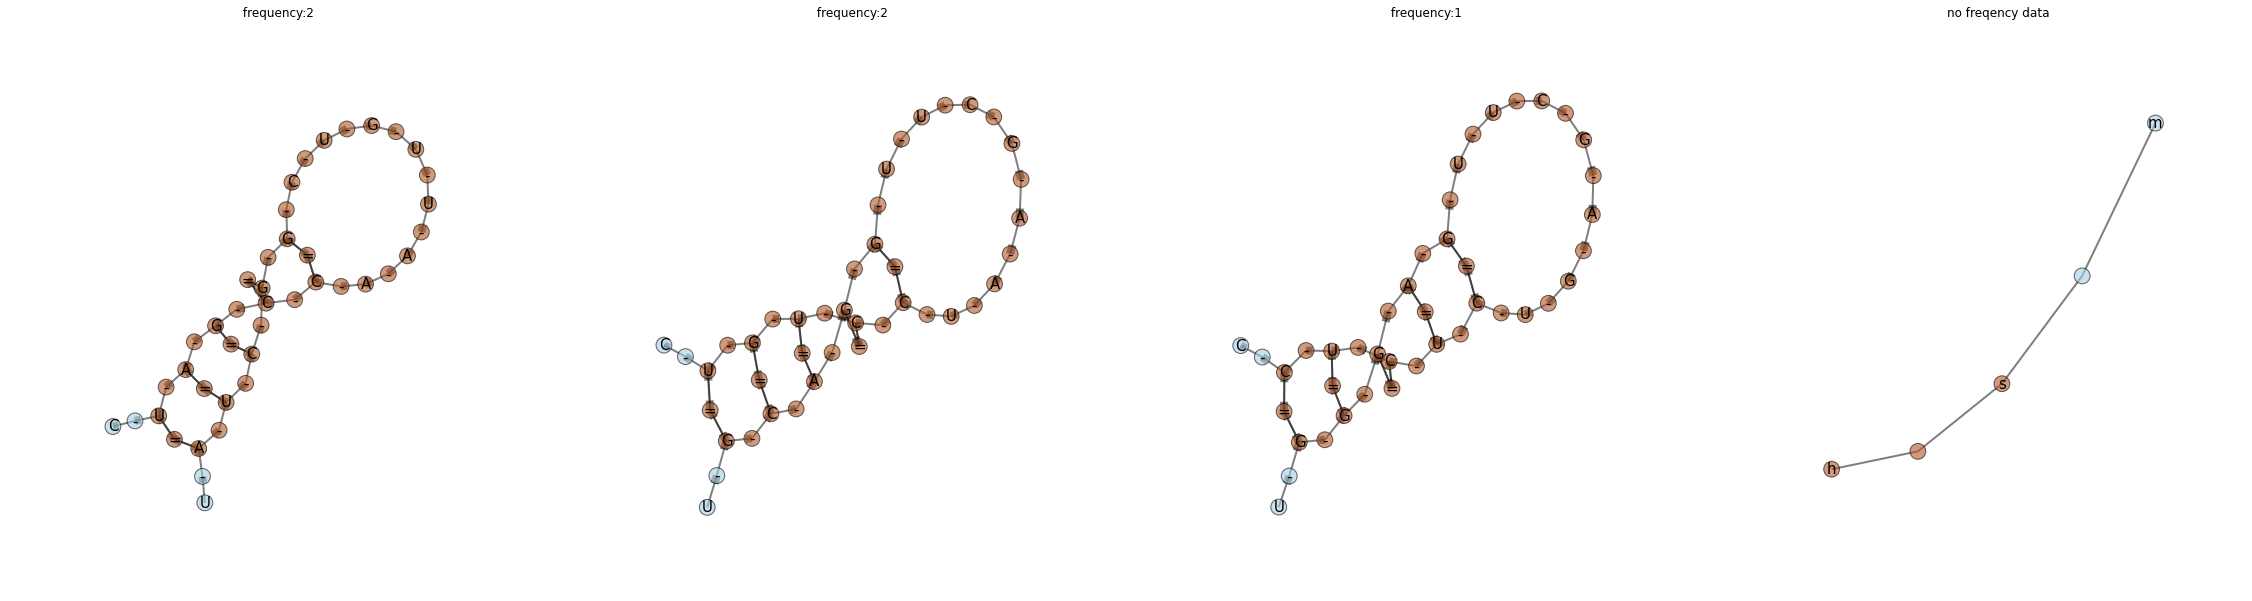

In [7]:
#draw production rules
myutils.draw_grammar(sampler.lsgg.productions,n_productions=20,n_graphs_per_production=3,
                     n_graphs_per_line=6, size=10, contract=False,
                     colormap='Paired', invert_colormap=False,node_border=1,
                     vertex_alpha=0.6, edge_alpha=0.5, node_size=250)




Loaded model: tmp/rna_ubergrammar.ge
preprocessing grammar
_sample_notes: None
accept_static_penalty: 0.0
base_thickness_list: [2]
batch_size: 1
    burnin: 0
complexity: 3
 estimator: CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.000981975557728, average=False, class_weight=None,
       epsilon=0.1, eta0=0.762269803813, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='log', n_iter=92, n_jobs=1,
       penalty='elasticnet', power_t=0.918897167, random_state=None,
       shuffle=True, verbose=0, warm_start=False),
            cv=2, method='sigmoid')
estimatorobject: <graphlearn.estimatorwrapper.EstimatorWrapper instance at 0x7fe2cc2174d0>
feasibility_checker: <graphlearn.feasibility.FeasibilityChecker instance at 0x7fe2cc217440>
generator_mode: False
hash_bitmask: 1048575
improving_linear_start: 0
improving_penalty_per_step: 0.04
improving_threshold: 25
keep_duplicates: True
      lsgg: <graphlearn.abstract_graphs.ubergraphlearn.UberGrammar object 

/home/ikea/.local/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/home/ikea/.local/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


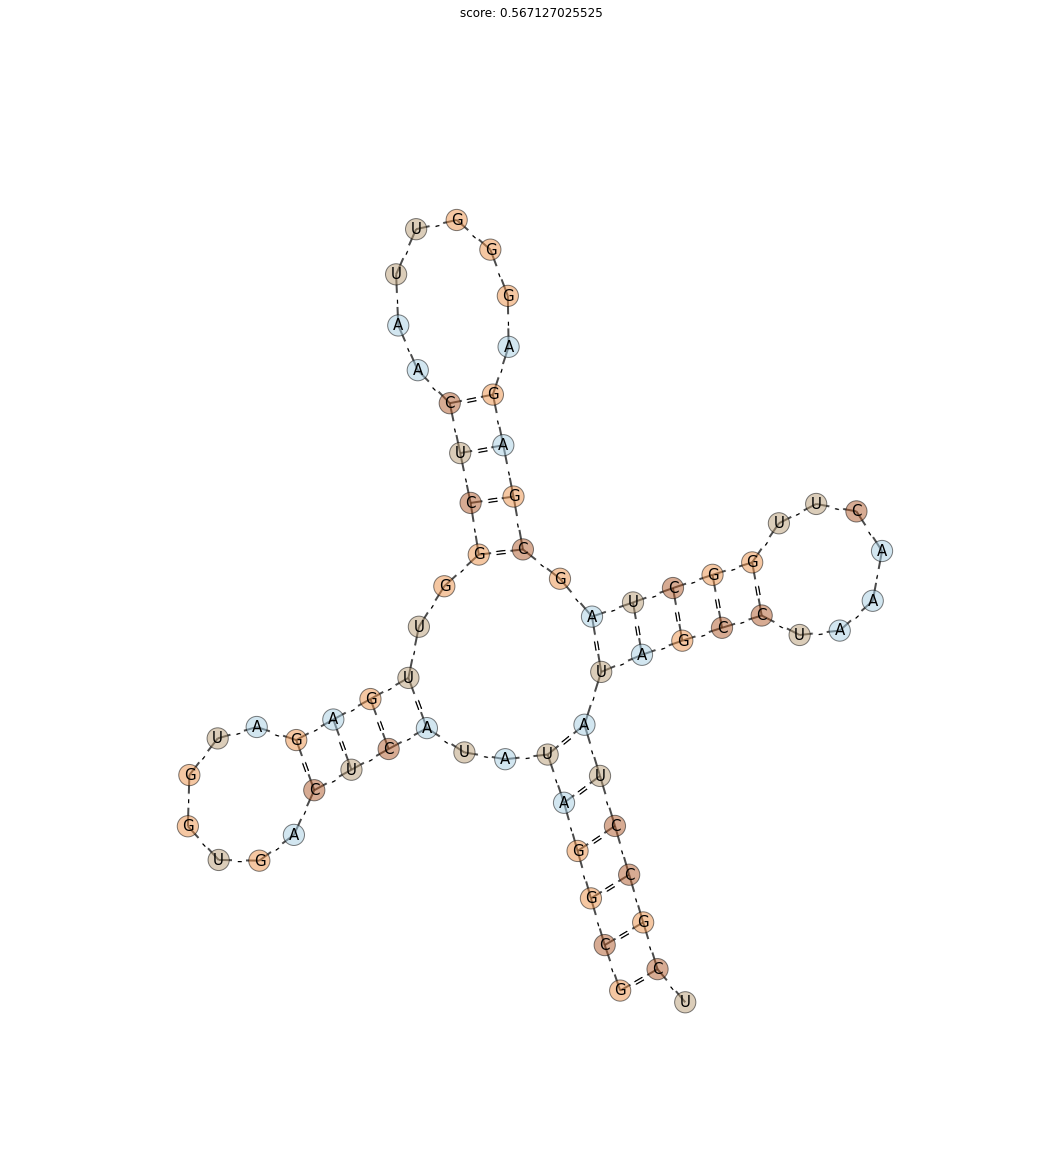

_propose_graph: iteration 0 ; core 0 of 9 ; original_cips tried  0
_propose_graph: iteration 1 ; core 0 of 34 ; original_cips tried  1
_propose_graph: iteration 2 ; core 0 of 44 ; original_cips tried  0
_propose_graph: iteration 3 ; core 0 of 34 ; original_cips tried  0
_propose_graph: iteration 4 ; core 0 of 6 ; original_cips tried  1
_propose_graph: iteration 5 ; core 0 of 34 ; original_cips tried  0
_propose_graph: iteration 6 ; core 0 of 6 ; original_cips tried  0
_propose_graph: iteration 7 ; core 0 of 34 ; original_cips tried  0
_propose_graph: iteration 8 ; core 0 of 45 ; original_cips tried  0
unfoldable
Traceback (most recent call last):
  File "graphlearn/graphlearn.py", line 341, in _sample
    candidate_graph = self._propose(graph)
  File "graphlearn/abstract_graphs/rnasampler.py", line 19, in _propose
    graph2 = self._propose_graph(graph)
  File "graphlearn/graphlearn.py", line 528, in _propose_graph
    return self.postprocessor.postprocess(graph_new)
  File "graphlearn

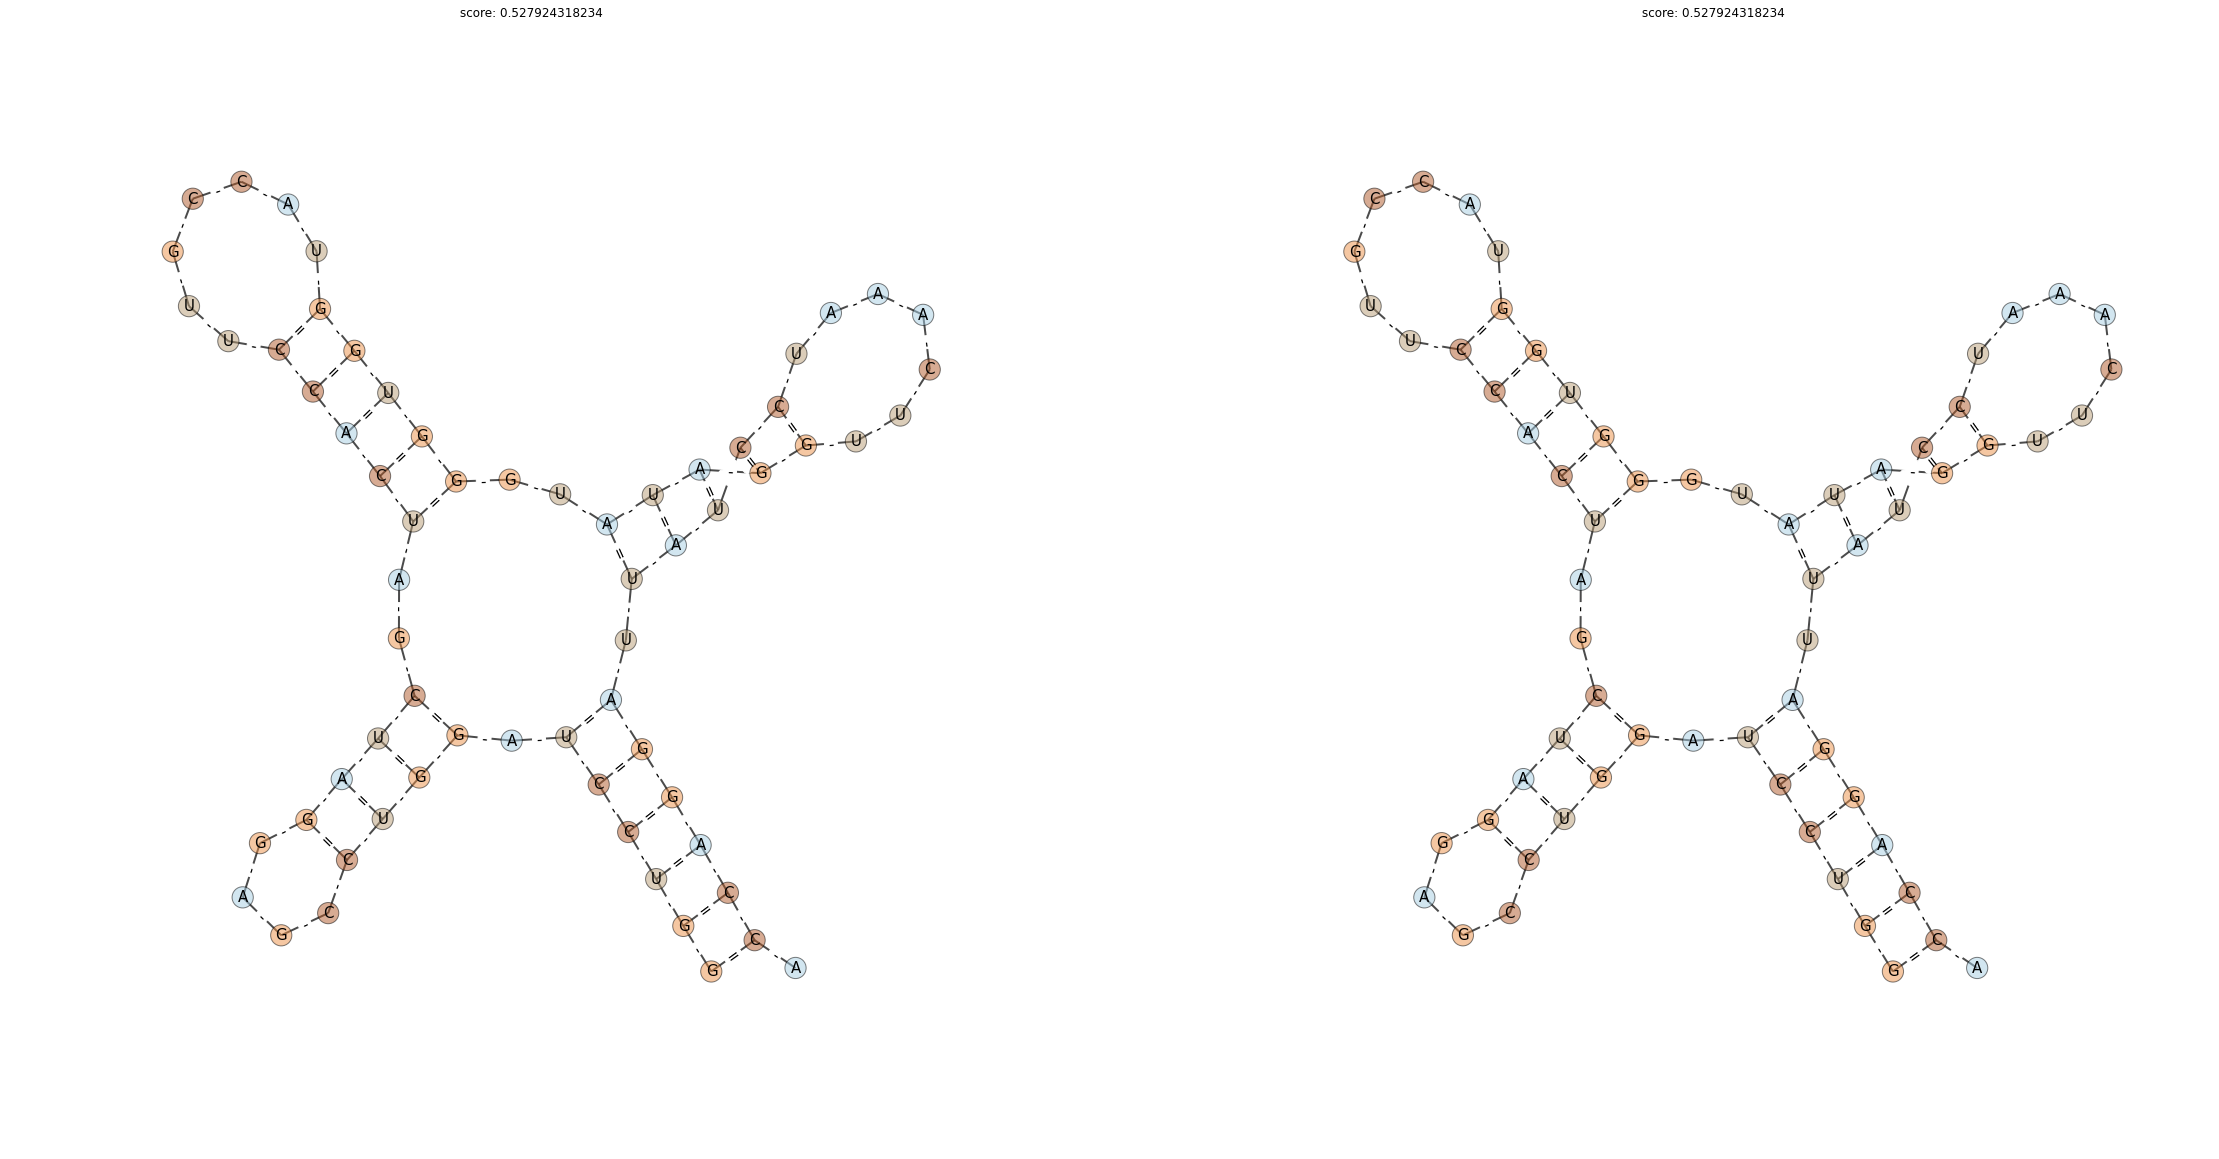

_propose_graph: iteration 0 ; core 0 of 3 ; original_cips tried  0
unfoldable
Traceback (most recent call last):
  File "graphlearn/graphlearn.py", line 341, in _sample
    candidate_graph = self._propose(graph)
  File "graphlearn/abstract_graphs/rnasampler.py", line 19, in _propose
    graph2 = self._propose_graph(graph)
  File "graphlearn/graphlearn.py", line 528, in _propose_graph
    return self.postprocessor.postprocess(graph_new)
  File "graphlearn/abstract_graphs/rnaabstract.py", line 349, in postprocess
    raise Exception('unfoldable')
Exception: unfoldable

Graph id: 17


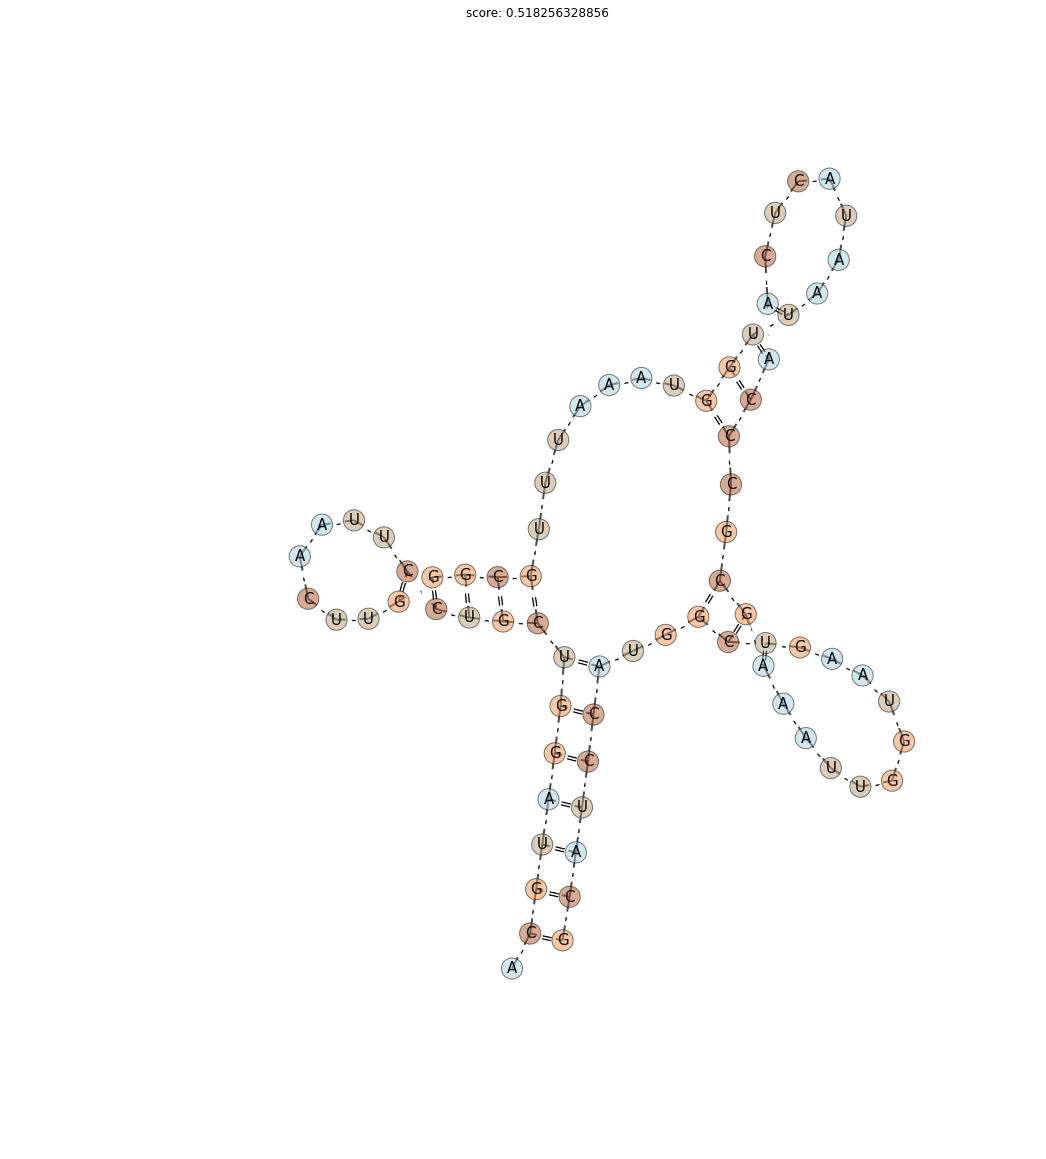

CPU times: user 14.2 s, sys: 1.18 s, total: 15.4 s
Wall time: 23.8 s


In [8]:
%%time
'''
RNA sampling
'''
import os
os.nice(19)

#import mpld3
#mpld3.enable_notebook()
import graphlearn.utils.draw as myutils
import graphlearn.abstract_graphs.rnasampler as rspl
from eden.converter.graph.gspan import gspan_to_eden
import itertools
import matplotlib.pyplot as plt
import graphlearn.utils.draw as myutils
import eden.graph as ge

sampler=rspl.RNASampler()
sampler.load('tmp/rna_ubergrammar.ge')


def fasta(filename='RF00005.fa'):
    s=[]
    with open(filename) as f:
        for line in f:
            s.append(line)

    while s:
        seqname=s[0]
        seq=''
        for i,l in enumerate(s[1:]):
            if l[0] != '>':
                seq+=l.strip()
            else:
                break
       
        yield seq  # note that seqname is also available but we dont use that here
        s=s[i+1:]


graphs = fasta()
id_start=15
id_end=id_start+3
graphs = itertools.islice(graphs,id_start,id_end)
n_steps=50



graphs = sampler.sample(graphs,
                        n_samples=7,
                        batch_size=1,
                        n_steps=n_steps,
                        n_jobs=1,
                        quick_skip_orig_cip=True,
                        probabilistic_core_choice=True,
                        burnin=0,
                        improving_threshold=0.5,
                        select_cip_max_tries=200,
                        keep_duplicates=True)

from eden.modifier.graph.vertex_attributes import colorize   
scores=[]
ids=range(id_start,id_end)
for i,graph in enumerate(graphs):
    print 'Graph id: %d'%(ids[i])
    scores.append(graph.graph['sampling_info']['score_history'])
    path_graphs = graph.graph['sampling_info']['graphs_history']
    path_graphs = colorize(path_graphs,
                           output_attribute = 'color_level', 
                           labels = ['A','U','G','C'])
    path_graphs= list(path_graphs)
    myutils.graphlearn_draw(path_graphs,
                           n_graphs_per_line=3, size=20, 
                           colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='color_level',
                           vertex_alpha=0.5, edge_alpha=0.7, node_size=450,edge_label='label',
                          headlinehook= myutils.get_score_of_graph
                          )

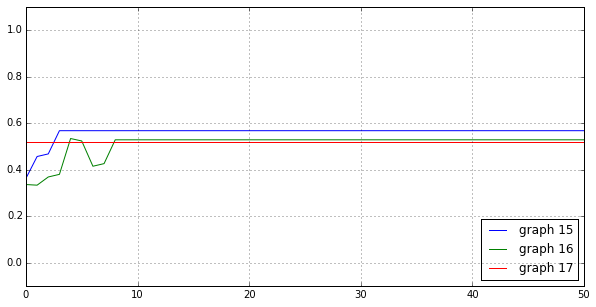

In [9]:
%matplotlib inline
from itertools import islice
import numpy as np

step=1
num_graphs_per_plot=3
num_plots=np.ceil([len(scores)/num_graphs_per_plot])
for i in range(num_plots):
    plt.figure(figsize=(10,5))
    for j,score in enumerate(scores[i*num_graphs_per_plot:i*num_graphs_per_plot+num_graphs_per_plot]):
        data = list(islice(score,None, None, step))
        plt.plot(data, label='graph %d'%(j+i*num_graphs_per_plot+id_start))
    plt.legend(loc='lower right')
    plt.grid()
    plt.ylim(-0.1,1.1)
    plt.show()

In [ ]:

import networkx as nx
import graphlearn.utils.draw as draw
from eden.graph import Vectorizer

v=Vectorizer()
def getpathgraph(labels):
    nlabels= len(labels)
    G=nx.path_graph(nlabels)
    for e in range(nlabels):
        G.node[e]['label']=labels[e]
    for e in range(nlabels-1):
        G.edge[e][e+1]['label']='.'
    return G

g=getpathgraph("ABC")

g= v._edge_to_vertex_transform(g)

draw.graphlearn_draw(g,contract=False,show_direction=True)

g2=nx.DiGraph(g)
#draw.display(g2,contract=False,vertex_label='id')

for n,d in g2.nodes(data=True):
    if 'edge' in d:
        if d['label']=='.':
            ns=g2.neighbors(n)
            g2.remove_edge(ns[1],n)
            g2.remove_edge(n,ns[0])
          
       
#g2 = g2.to_undirected()
draw.graphlearn_draw(g2,contract=False,vertex_label='id',show_direction=True)
g2.edges()
for n in g2.nodes():
    print n,g2.neighbors(n)
print isinstance(g2, nx.DiGraph) 

In [ ]:
g2.edges(0,data=True)

In [ ]:
asd = g2.subgraph(range(2)).copy()

In [ ]:
class A(object):
    def __init__(self,a=123):
        self.a=a
        
        
class B(A):
    def __init__(self,b=122):
        super(B,self).__init__(b)
        
        

class C(A):
    def __init__(self,c=121):
        super(C,self).__init__(c)
        
        
c=C()
c.a
        
        
        
    
    

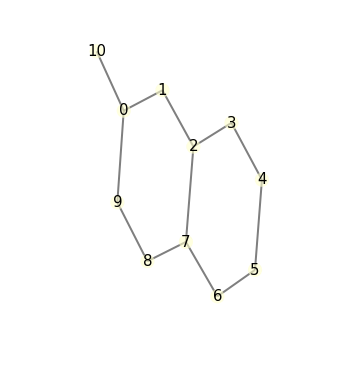

AttributeError: 'module' object has no attribute 'rooted_problem_cycle'

In [14]:
# testin cycle stuff
import networkx as nx
import graphlearn.utils.draw as draw
import graphlearn.feasibility as feas
from eden.graph import Vectorizer
v=Vectorizer()
%matplotlib inline


def find_all_cycles(G, source=None, cycle_length_limit=None):
    """forked from networkx dfs_edges function. Assumes nodes are integers, or at least
    types which work with min() and > ."""
    if source is None:
        # produce edges for all components
        nodes=[i[0] for i in nx.connected_components(G)]
    else:
        # produce edges for components with source
        nodes=[source]
    # extra variables for cycle detection:
    cycle_stack = []
    output_cycles = set()
    
    def get_hashable_cycle(cycle):
        """cycle as a tuple in a deterministic order."""
        m = min(cycle)
        mi = cycle.index(m)
        mi_plus_1 = mi + 1 if mi < len(cycle) - 1 else 0
        if cycle[mi-1] > cycle[mi_plus_1]:
            result = cycle[mi:] + cycle[:mi]
        else:
            result = list(reversed(cycle[:mi_plus_1])) + list(reversed(cycle[mi_plus_1:]))
        return tuple(result)
    
    for start in nodes:
        if start in cycle_stack:
            continue
        cycle_stack.append(start)
        
        stack = [(start,iter(G[start]))]
        while stack:
            parent,children = stack[-1]
            try:
                child = next(children)
                
                if child not in cycle_stack:
                    cycle_stack.append(child)
                    stack.append((child,iter(G[child])))
                else:
                    i = cycle_stack.index(child)
                    if i < len(cycle_stack) - 2: 
                      output_cycles.add(get_hashable_cycle(cycle_stack[i:]))
                
            except StopIteration:
                stack.pop()
                cycle_stack.pop()
    
    return [list(i) for i in output_cycles]


def getpathgraph(labels):
    nlabels= len(labels)
    G=nx.path_graph(nlabels)
    for e in range(nlabels):
        G.node[e]['label']=labels[e]
    for e in range(nlabels-1):
        G.edge[e][e+1]['label']='.'
    return G

#g=getpathgraph("ABC")

#g= v._edge_to_vertex_transform(g)

#draw.graphlearn_draw(g,contract=False,show_direction=True)


#draw.display(g2,contract=False,vertex_label='id')

g=nx.cycle_graph(10)
g.add_edge(2,7)
g.add_edge(10,0)

draw.graphlearn_draw(g, vertex_label='id')


feas.rooted_problem_cycle(g,2,4)

In [ ]:
print g.graph

In [ ]:
s=[]
with open('RF00005.fa') as f:
    for e in f:
        s.append(e)
        
print s[2]

In [ ]:
class lol():
  
    def __getitem__(self,what):
        return 4
    
l=lol()
l['what']

In [ ]:
dir({})

In [13]:
import networkx as nx
isinstance(0,nx.Graph)

False